In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
df = pd.read_csv('full_df_agesex.csv')
df.sort_values(by='gender_ratio', ascending=True)

oktmo   agrprod  avgemployers  avgsalary  badcompanies  beforeschool  \
415   18720000  0.812203      0.823200   0.785470      0.361576      1.039231   
1511  71626000  2.297107      0.188267   0.888286      0.176280      1.156395   
1859  91701000  0.020129      1.953867   0.842556      0.930942      1.286251   
57     1659000  1.996656      0.260000   0.686260      0.815528      0.821644   
1654  78715000  0.000000      3.315933   1.022976      0.373757      1.335173   
...        ...       ...           ...        ...           ...           ...   
68     1755000  0.003848      0.123467   0.654716      0.000000      1.519649   
1346  65710000  0.521514      0.060733   1.081660      1.999200      1.479408   
468   22615000  0.135189      0.193800   0.612100      0.873286      1.139638   
1320  64720000  0.053157      0.193933   2.407592      0.722961      1.163968   
291   11712000  0.000000      0.066333   2.223702      2.118644      0.487288   

      budincome   cinemas  circuses  cliniccap  ...  total_male  total_female  \
415    0.214808  0.036523       0.0   0.535669  ...     27067.0       41174.0   
1511   0.617440  0.000000       0.0   0.466162  ...     11460.0       14726.0   
1859   0.326323  0.161202       0.0   0.600137  ...     51944.0       64741.0   
57     0.319552  0.123565       0.0   0.715852  ...     12485.0       15480.0   
1654   0.378694  0.034849       0.0   0.644778  ...     96468.0      117699.0   
...         ...       ...       ...        ...  ...         ...           ...   
68     0.286594  0.000000       0.0   0.000000  ...      7644.0        4798.0   
1346   1.077901  0.000000       0.0   1.243947  ...      2301.0        1398.0   
468    0.755683  0.264632       0.0   0.681163  ...      6884.0        4114.0   
1320   2.443413  0.000000       0.0   0.562303  ...      4515.0        2222.0   
291    0.491038  0.000000       0.0   0.451977  ...      2644.0        1164.0   

      total_pop  gender_ratio  share_male_children  share_male_work  \
415     68241.0      0.657381             0.095558         0.278366   
1511    26186.0      0.778215             0.121133         0.288398   
1859   116685.0      0.802335             0.126117         0.295796   
57      27965.0      0.806525             0.114643         0.298766   
1654   214167.0      0.819616             0.181863         0.248796   
...         ...           ...                  ...              ...   
68      12442.0      1.593164             0.160585         0.444784   
1346     3699.0      1.645923             0.117599         0.472560   
468     10998.0      1.673311             0.094199         0.495363   
1320     6737.0      2.031953             0.108208         0.534511   
291      3808.0      2.271478             0.079044         0.606880   

      share_male_elderly  share_female_children  share_female_work  \
415             0.022714               0.125570           0.378761   
1511            0.028107               0.143359           0.316276   
1859            0.023251               0.123178           0.349437   
57              0.033041               0.113642           0.330628   
1654            0.019774               0.229965           0.245677   
...                  ...                    ...                ...   
68              0.009002               0.103761           0.246665   
1346            0.031901               0.102190           0.206542   
468             0.036370               0.086016           0.205947   
1320            0.027460               0.091584           0.196230   
291             0.008403               0.060399           0.216912   

      share_female_elderly  
415               0.099031  
1511              0.102727  
1859              0.082221  
57                0.109279  
1654              0.073924  
...                    ...  
68                0.035203  
1346              0.069208  
468               0.082106  
1320              0.042007  
291               0.028361  

[2006 rows x 67 colu

In [ ]:
df['share_elderly'] = df['share_male_elderly'] + df['share_female_elderly']
df['share_work'] = df['share_male_work'] + df['share_female_work']
df['share_children'] = df['share_male_children'] + df['share_female_children']

In [ ]:
saldo = df['ydel_saldo']
features = df.drop(['name', 'oktmo',
                      'male_elderly','male_work','male_children',
                      'total_female','total_male','female_elderly',
                      'female_work','female_children','ydel_saldo', 'total_pop'], axis=1)
scaler = MinMaxScaler()
features_s = scaler.fit_transform(features)

In [ ]:
features

agrprod  avgemployers  avgsalary  badcompanies  beforeschool  \
0     0.716382      0.087800   0.652000      0.000000      1.301992   
1     3.296481      0.080133   0.650502      0.357910      0.767717   
2     0.777272      0.180533   0.659340      0.760283      1.009275   
3     2.478656      0.062000   0.689172      2.501876      0.941331   
4     1.268926      0.243067   0.702138      0.471757      0.890835   
...        ...           ...        ...           ...           ...   
2001  0.816447      0.141867   0.891492      1.614778      1.248224   
2002  0.173217      0.564733   1.400828      0.848428      1.335214   
2003  1.468823      0.075000   0.859698      1.971091      2.529566   
2004  0.348924      0.232467   1.314660      0.902772      1.205200   
2005  0.045385      1.275533   1.153818      0.583635      1.620681   

      budincome   cinemas  circuses  cliniccap  consnewapt  ...  gender_ratio  \
0      0.000000  0.000000       0.0   0.000000    0.000000  ...      1.010884   
1      0.213511  0.000000       0.0   0.292691    0.004305  ...      0.991954   
2      0.186550  0.000000       0.0   0.371694    0.020405  ...      0.948953   
3      0.284485  0.379072       0.0   1.206460    0.006060  ...      0.927761   
4      0.191067  0.095305       0.0   0.548636    0.029220  ...      0.956393   
...         ...       ...       ...        ...         ...  ...           ...   
2001   0.684637  0.195731       0.0   0.242576    0.001750  ...      1.242757   
2002   0.304931  0.000000       0.0   0.458623    0.002300  ...      1.108516   
2003   0.643626  0.398200       0.0   1.080450    0.000000  ...      0.951683   
2004   0.287755  0.000000       0.0   0.399226    0.019300  ...      0.980925   
2005   0.351911  0.088430       0.0   0.708792    0.042600  ...      0.847791   

      share_male_children  share_male_work  share_male_elderly  \
0                0.135471         0.331933            0.035302   
1                0.132553         0.323469            0.041959   
2                0.139087         0.315148            0.032669   
3                0.124313         0.317176            0.039775   
4                0.132260         0.318822            0.037773   
...                   ...              ...                 ...   
2001             0.151537         0.383295            0.019289   
2002             0.141281         0.360391            0.024061   
2003             0.151115         0.315560            0.020948   
2004             0.126408         0.342614            0.026163   
2005             0.131281         0.306225            0.021308   

      share_female_children  share_female_work  share_female_elderly  \
0                  0.125939           0.268115              0.103239   
1                  0.120023           0.261314              0.120683   
2                  0.126695           0.296359              0.090042   
3                  0.124057           0.271134              0.123545   
4                  0.128083           0.278996              0.104065   
...                     ...                ...                   ...   
2001               0.131127           0.255648              0.059105   
2002               0.125863           0.267535              0.080869   
2003               0.146522           0.290579              0.075277   
2004               0.121730           0.301735              0.081350   
2005               0.127967           0.335952              0.077267   

      share_elderly  share_work  share_children  
0          0.138541    0.600048        0.261410  
1          0.162641    0.584783        0.252576  
2          0.122712    0.611507        0.265782  
3          0.163320    0.588311        0.248369  
4          0.141839    0.597818        0.260344  
...             ...         ...             ...  
2001       0.078393    0.638943        0.282664  
2002       0.104929    0.627926        0.267144  
2003       0.096225    0.606139        0.297636  
2004       0.107513    

# Кластеризация по полу-возрасту

In [ ]:
age_sex_df = df[['share_male_children', 'share_male_work', 'share_female_children',
                      'share_female_work', 'share_male_elderly', 'share_female_elderly']]
age_sex_df

share_male_children  share_male_work  share_female_children  \
0                0.135471         0.331933               0.125939   
1                0.132553         0.323469               0.120023   
2                0.139087         0.315148               0.126695   
3                0.124313         0.317176               0.124057   
4                0.132260         0.318822               0.128083   
...                   ...              ...                    ...   
2001             0.151537         0.383295               0.131127   
2002             0.141281         0.360391               0.125863   
2003             0.151115         0.315560               0.146522   
2004             0.126408         0.342614               0.121730   
2005             0.131281         0.306225               0.127967   

      share_female_work  share_male_elderly  share_female_elderly  
0              0.268115            0.035302              0.103239  
1              0.261314            0.041959              0.120683  
2              0.296359            0.032669              0.090042  
3              0.271134            0.039775              0.123545  
4              0.278996            0.037773              0.104065  
...                 ...                 ...                   ...  
2001           0.255648            0.019289              0.059105  
2002           0.267535            0.024061              0.080869  
2003           0.290579            0.020948              0.075277  
2004           0.301735            0.026163              0.081350  
2005           0.335952            0.021308              0.077267  

[2006 rows x 6 columns]

In [ ]:
# Масштабирование в интервал [0,1]
scaler_agesex = MinMaxScaler()
agesex_s = pd.DataFrame(scaler_agesex.fit_transform(age_sex_df), columns=age_sex_df.columns)

In [ ]:
# PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(agesex_s)

agesex_sn = agesex_s.copy()

agesex_s['PCA1'] = pca_result[:,0]
agesex_s['PCA2'] = pca_result[:,1]

Оптимальное число кластеров по методу максимального расстояния: 3


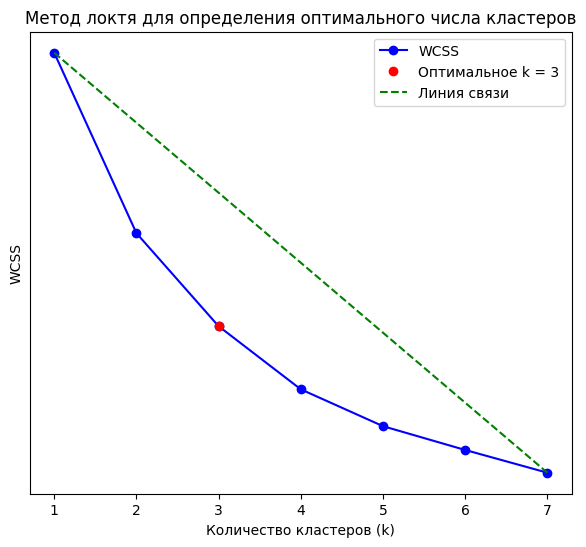

In [ ]:
from sklearn.cluster import KMeans

def elbow_method_with_max_distance(data, max_clusters=10):
    wcss = []
    K = range(1, max_clusters + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=20)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Построение графика метода локтя
    plt.figure(figsize=(7, 6))
    plt.plot(K, wcss, 'bo-', label='WCSS')
    plt.xlabel('Количество кластеров (k)')
    plt.ylabel('WCSS')
    plt.title('Метод локтя для определения оптимального числа кластеров')

    # Определение линии между первой и последней точками
    point1 = np.array([K[0], wcss[0]])
    point2 = np.array([K[-1], wcss[-1]])

    # Уравнение прямой в виде Ax + By + C = 0
    A = point2[1] - point1[1]
    B = point1[0] - point2[0]
    C = point2[0]*point1[1] - point1[0]*point2[1]

    # Вычисление расстояний от всех точек до прямой
    distances = []
    for i in range(len(K)):
        x0 = K[i]
        y0 = wcss[i]
        distance = abs(A*x0 + B*y0 + C) / np.sqrt(A**2 + B**2)
        distances.append(distance)

    # Определение индекса максимального расстояния
    optimal_index = np.argmax(distances)
    optimal_k = K[optimal_index]
    print(f'Оптимальное число кластеров по методу максимального расстояния: {optimal_k}')

    # Добавление точки оптимального k на график
    plt.plot(optimal_k, wcss[optimal_index], 'ro', label=f'Оптимальное k = {optimal_k}')

    # Отрисовка линии
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'g--', label='Линия связи')

    plt.legend()

    plt.yticks([])
    plt.show()

    return optimal_k

optimal_k = elbow_method_with_max_distance(agesex_sn, max_clusters=7)

In [ ]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=42, n_init=20, max_iter=100)
cluster_labels = kmeans.fit_predict(agesex_sn)
# Добавляем кластерные метки в DataFrame
agesex_s['Cluster'] = cluster_labels

In [ ]:
from sklearn.mixture import GaussianMixture
n = 3
gmm = GaussianMixture(n_components=n, covariance_type='spherical', random_state=42)
cluster_labels = gmm.fit_predict(agesex_sn)
# Добавляем кластерные метки в DataFrame
agesex_s['Cluster'] = cluster_labels

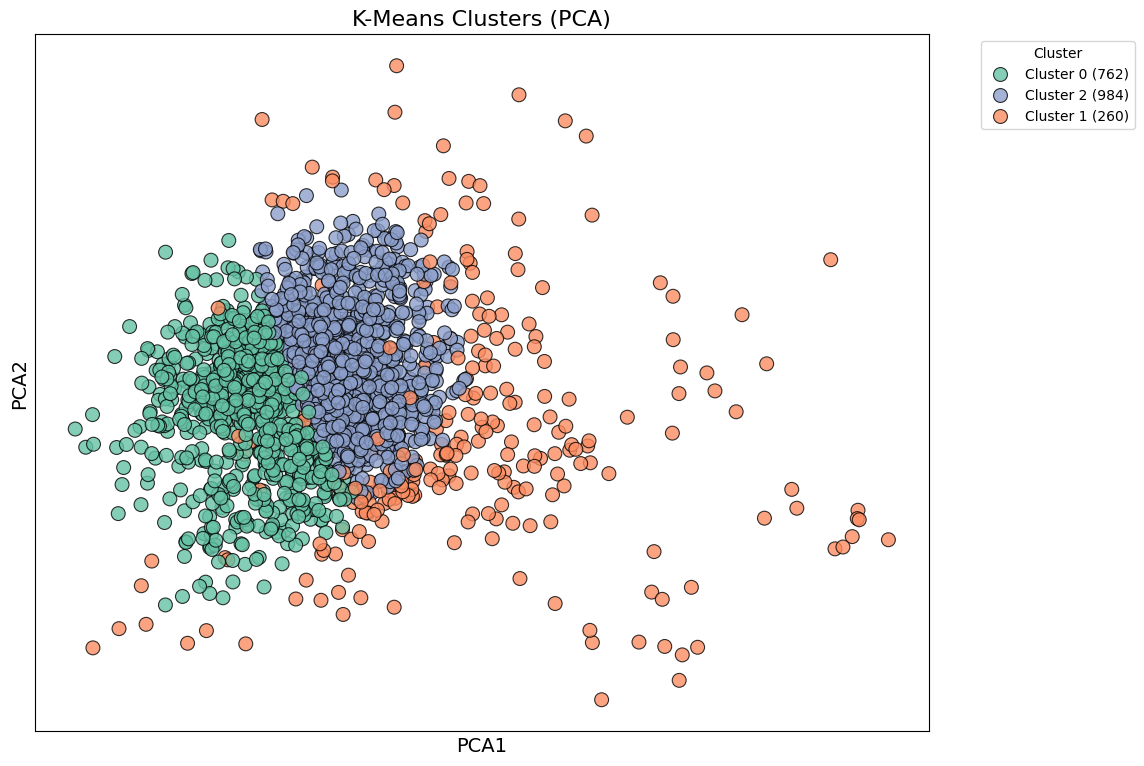

Silhouette Score is 0.2411486677576577


In [ ]:
from sklearn.metrics import silhouette_score


def plot_clusters(df, x, y, cluster_col, raw_data, title):
    # 1. Подсчёт количества объектов в каждом кластере
    cluster_counts = df[cluster_col].value_counts().sort_index()

    # 2. Создание маппинга меток кластеров с их количествами
    label_mapping = {cluster: f'Cluster {cluster} ({count})' for cluster, count in cluster_counts.items()}

    # 3. Создание нового столбца для отображения в легенде
    df['Cluster_with_count'] = df[cluster_col].map(label_mapping)

    # 4. Определение порядка цветов для последовательности кластеров
    unique_clusters = sorted(df[cluster_col].unique())
    palette = sns.color_palette('Set2', n_colors=len(unique_clusters))
    palette_dict = {label: palette[i] for i, label in enumerate(label_mapping.values())}

    # 5. Построение графика
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue='Cluster_with_count',
        palette=palette_dict,
        s=100,
        edgecolor='k',
        alpha=0.8
    )

    # 6. Настройка легенды
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles, labels=labels, title=cluster_col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # 7. Добавление заголовка и отображение графика
    plt.title(title, fontsize=16)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.show()


    print("Silhouette Score is", silhouette_score(raw_data, df[cluster_col]))

    # 8. Удаление временного столбца
    df.drop('Cluster_with_count', axis=1, inplace=True)

plot_clusters(agesex_s, 'PCA1', 'PCA2', 'Cluster', agesex_sn, 'K-Means Clusters (PCA)')

Exp1: With gender_ratio & shares according to cohort sums


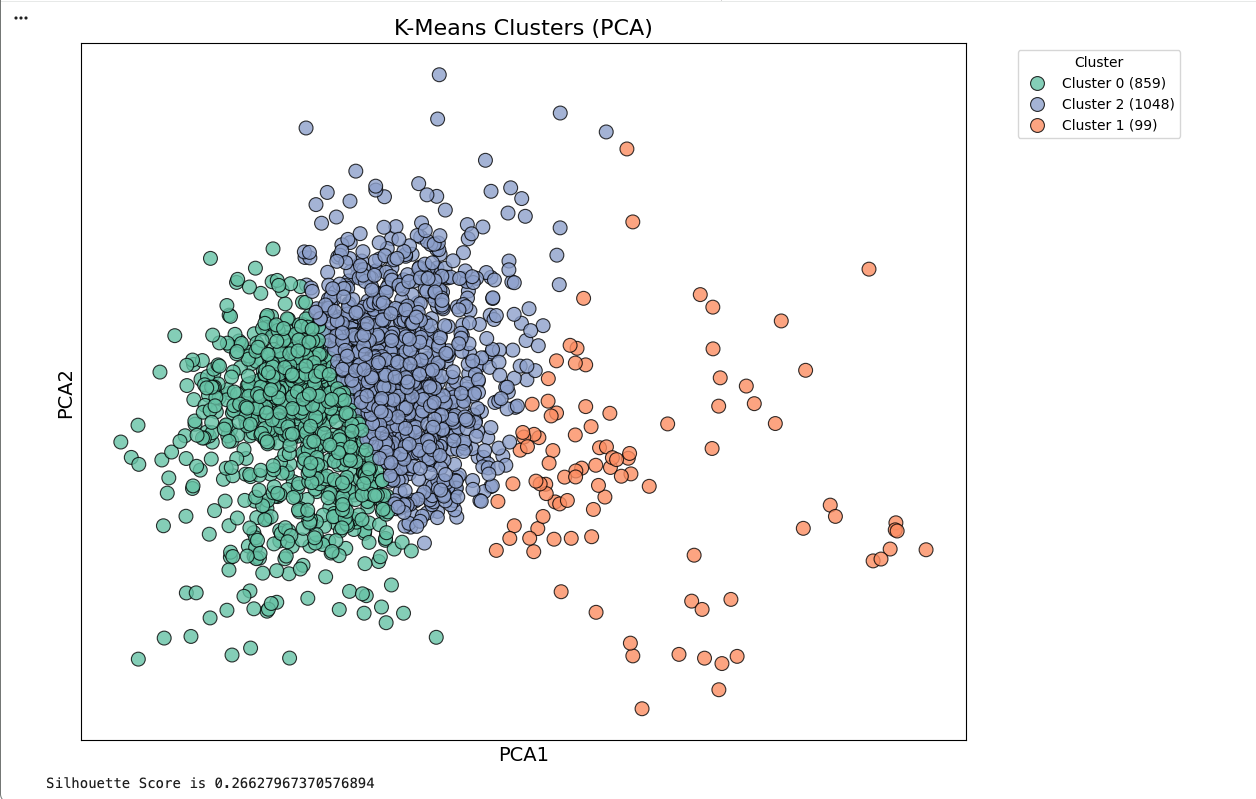

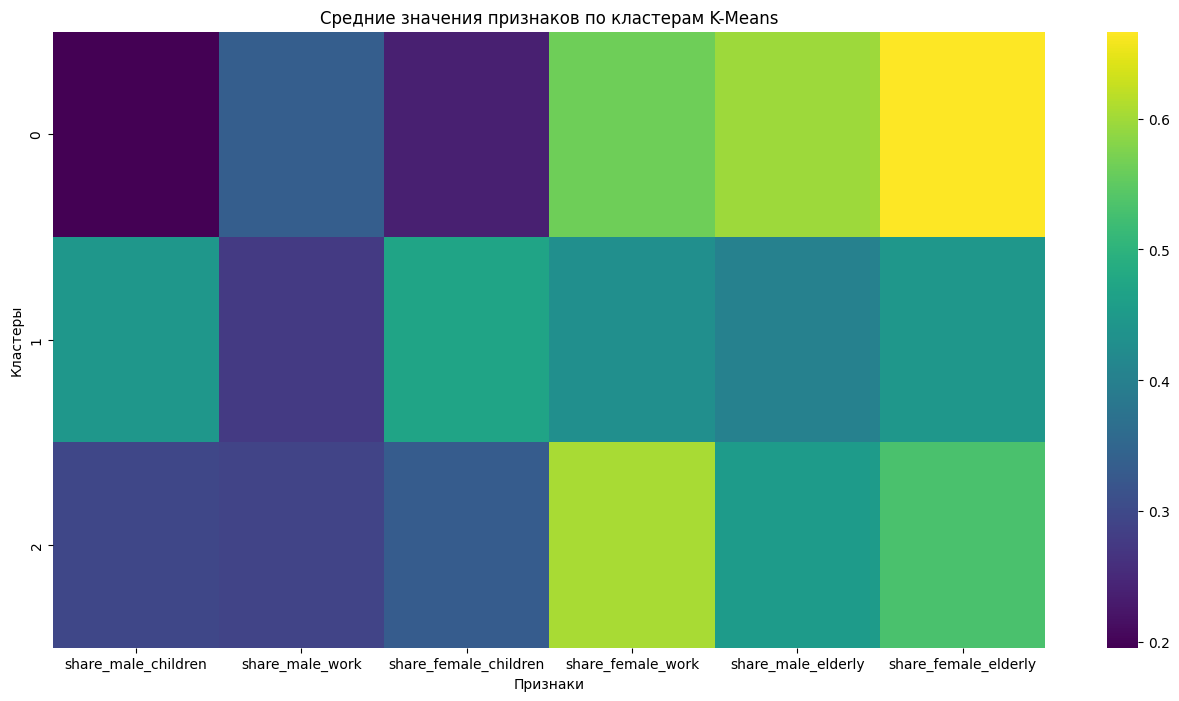

In [ ]:
# Heatmap средних значений по кластерам
cluster_means = agesex_s.groupby('Cluster').mean()
cluster_means = cluster_means.drop(['oktmo', 'PCA1', 'PCA2', 'tSNE1', 'tSNE2', 'Cluster_DB', 'Cluster_agg'], axis=1, errors='ignore')

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means,annot=False, cmap='viridis')
plt.title('Средние значения признаков по кластерам K-Means')
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.show()


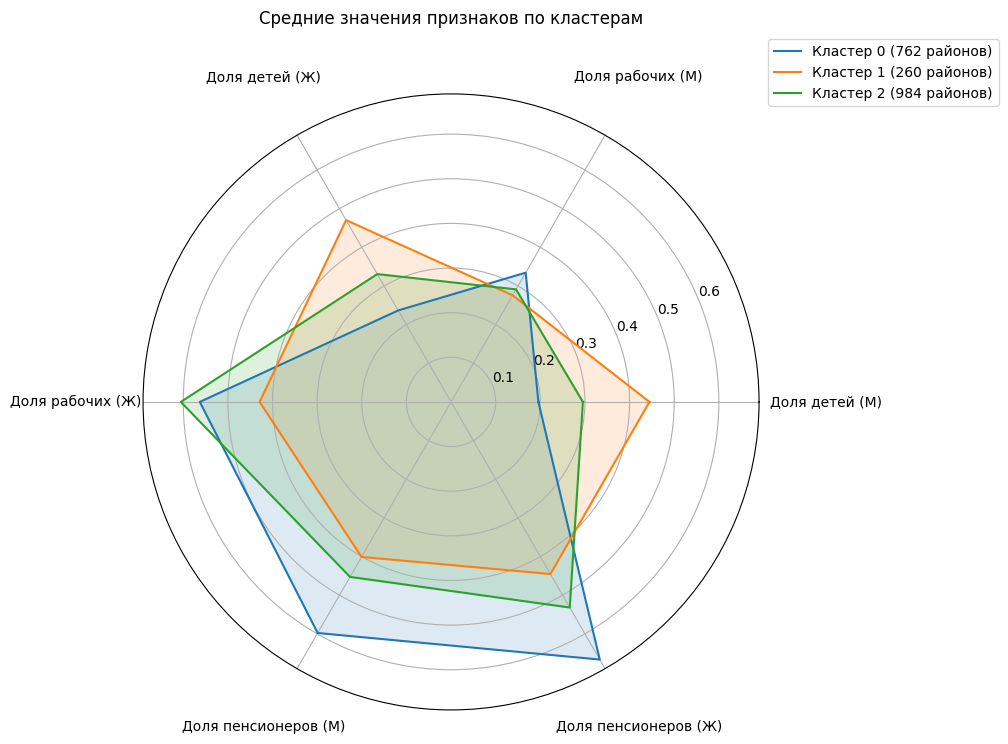

In [ ]:
labels_rus = ["Доля детей (М)", "Доля рабочих (М)", "Доля детей (Ж)", "Доля рабочих (Ж)", "Доля пенсионеров (М)", "Доля пенсионеров (Ж)"]

num_features = len(labels_rus)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

# Подсчет количества муниципальных районов в кластерах
cluster_counts = agesex_s['Cluster'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Построение радарных диаграмм
for cluster in cluster_means.index:
    values = cluster_means.loc[cluster].values.flatten().tolist()
    values += values[:1]
    count = cluster_counts[cluster]
    ax.plot(angles, values, label=f'Кластер {cluster} ({count} районов)')
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(np.degrees(angles[:-1]), labels_rus)
ax.tick_params(axis='x', which='major', pad=38)

plt.title('Средние значения признаков по кластерам', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))
plt.show()

In [ ]:
agesex_s_mig = pd.concat([saldo, agesex_s], axis=1)

/tmp/ipython-input-3957113782.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=feature, data=agesex_s_mig, palette='Set2')


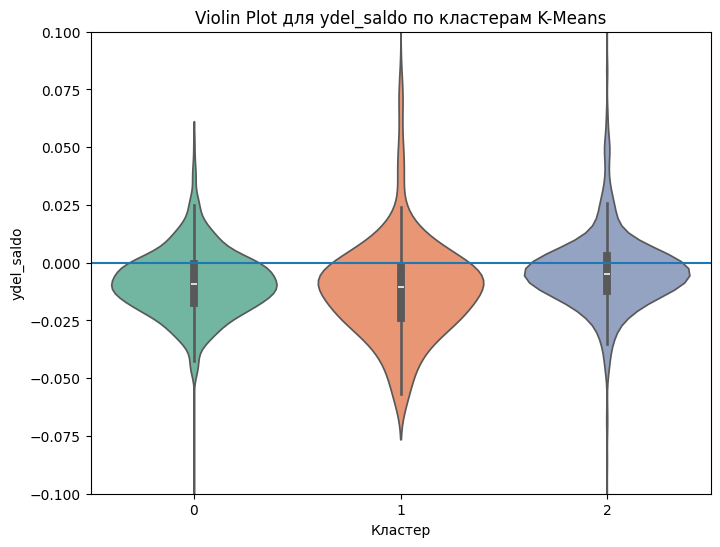

In [ ]:
selected_features = ['ydel_saldo']

# Построение violin plot для каждого выбранного признака
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Cluster', y=feature, data=agesex_s_mig, palette='Set2')
    plt.title(f'Violin Plot для {feature} по кластерам K-Means')
    plt.xlabel('Кластер')
    plt.ylabel(feature)
    plt.ylim(-0.1,0.1)
    plt.axhline(y=0)
    plt.show()


# Кластеризация по другим социо-экономическим признакам

Feature importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(features_s, saldo, random_state=42)

param_grid = {'n_estimators': [100], 'max_depth': [None]}
rfr = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
rfr.fit(X_train, y_train)

print("MAE на тесте:", -rfr.score(X_test, y_test))
print("Best parameters:", rfr.best_params_)

perm_imp = permutation_importance(rfr, X_test, y_test, n_repeats=10, random_state=42)
importances = pd.Series(perm_imp.importances_mean, index=features.columns)
top_features = importances.sort_values(ascending=False).head(15).index.tolist()

print("Топ-15 признаков:", top_features)


# Проверяем корреляцию внутри топ-15
corr = features[top_features].corr().abs()
# Уберём из каждой сильно коррелирующей пары (r>0.8) менее интерпретируемый признак
to_drop = set()
for i in corr.columns:
    for j in corr.columns:
        if i != j and corr.loc[i,j] > 0.8:
            to_drop.add(j)
selected = [f for f in top_features if f not in to_drop]

print("Отфильтрованные по корреляции:", selected)

MAE на тесте: 0.010500257188181839
Best parameters: {'max_depth': None, 'n_estimators': 100}
Топ-15 признаков: ['consnewareas', 'popsize', 'roadslen', 'beforeschool', 'invest', 'schoolnum', 'hospitals', 'socialaid', 'livarea', 'sportsvenue', 'share_female_children', 'share_male_elderly', 'factoriescap', 'retailturnover', 'foodservturnover']
Отфильтрованные по корреляции: ['consnewareas', 'popsize', 'roadslen', 'beforeschool', 'invest', 'schoolnum', 'hospitals', 'socialaid', 'livarea', 'sportsvenue', 'share_female_children', 'share_male_elderly', 'factoriescap', 'retailturnover', 'foodservturnover']


In [ ]:
from sklearn.feature_selection import VarianceThreshold

variances = pd.Series(X_train.var(axis=0), index=features.columns)

# Отбираем фичи с variance >= 0.01
selector = VarianceThreshold(threshold=0.01)
selector.fit(X_train)

# Список отобранных имён
selected_vars = features.columns[selector.get_support()]

# по убыванию дисперсии:
selected_vars_sorted = variances[selected_vars].sort_values(ascending=False).index.tolist()

print("Отобранные и отсортированные по вариативности признаки:")
print(selected_vars_sorted)

Отобранные и отсортированные по вариативности признаки:
['litstreetperc', 'hospitals', 'cultureorg', 'avgsalary', 'pollutcapturedperc', 'sportsvenue', 'schoolnum', 'beforeschool', 'share_female_elderly', 'share_male_elderly', 'munipoliceworkers', 'docsnum', 'badhousesdwellers', 'servicesnum', 'goodcompanies', 'sportschool', 'library', 'share_male_children']


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# хотим взять, скажем, 15 лучших признаков
k = 15
selector = SelectKBest(score_func=mutual_info_regression, k=k)
selector.fit(X_train, y_train)

mask = selector.get_support()

# Массив оценок mutual information для всех признаков
mi_scores = pd.Series(selector.scores_, index=features.columns)

# Сортируем все фичи по убыванию MI и берём топ-k
selected_mi_sorted = mi_scores.sort_values(ascending=False).head(k).index.tolist()

print(f"Топ-{k} признаков по mutual information (отсортированные):")
print(selected_mi_sorted)


Топ-15 признаков по mutual information (отсортированные):
['consnewareas', 'schoolnum', 'hospitals', 'avgemployers', 'popsize', 'sportschool', 'share_female_elderly', 'musartschool', 'museums', 'visiblecompanies', 'sportsvenue', 'roadslen', 'retailturnover', 'avgsalary', 'gender_ratio']


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [300],
    'max_depth':    [6],
    'learning_rate': [0.01],
    'subsample':    [0.7]
}

xgb = GridSearchCV(
    XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid_xgb,
    cv=5,
    scoring='neg_mean_absolute_error'
)
xgb.fit(X_train, y_train)

print("Лучшие параметры XGBoost:", xgb.best_params_)
print("MAE на тесте (XGBoost):", -xgb.score(X_test, y_test))

importances_xgb = pd.Series(xgb.best_estimator_.feature_importances_, index=features.columns)
top_feats_xgb   = importances_xgb.sort_values(ascending=False).head(15).index.tolist()
print("Топ-15 признаков по XGBoost:", top_feats_xgb)

Лучшие параметры XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.7}
MAE на тесте (XGBoost): 0.010379494971067493
Топ-15 признаков по XGBoost: ['consnewareas', 'popsize', 'share_male_work', 'roadslen', 'socialaid', 'invest', 'share_male_elderly', 'cinemas', 'share_female_elderly', 'sportsvenue', 'beforeschool', 'goodcompincome', 'hospitals', 'retailturnover', 'harvest']


Провели отбор 18 наиболее значимых/полно-описывающих социум факторов

In [ ]:
agesex_s_mig

ydel_saldo  share_male_children  share_male_work  share_female_children  \
0      -0.020139             0.336323         0.286298               0.353625   
1      -0.016912             0.320367         0.264327               0.321704   
2       0.017850             0.356089         0.242728               0.357702   
3      -0.033594             0.275315         0.247993               0.343468   
4      -0.015099             0.318767         0.252264               0.365194   
...          ...                  ...              ...                    ...   
2001   -0.017899             0.424156         0.419622               0.381617   
2002   -0.005605             0.368087         0.360168               0.353215   
2003   -0.018405             0.421849         0.243796               0.464680   
2004   -0.001336             0.286772         0.314025               0.330912   
2005   -0.020567             0.313411         0.219566               0.364569   

      share_female_work  share_male_elderly  share_female_elderly      PCA1  \
0              0.393827            0.633256              0.667775 -0.011220   
1              0.356566            0.760203              0.790360 -0.132787   
2              0.548560            0.583059              0.575031  0.045701   
3              0.410367            0.718560              0.810477 -0.143208   
4              0.453437            0.680387              0.673581 -0.040642   
...                 ...                 ...                   ...       ...   
2001           0.325524            0.327887              0.357613  0.300534   
2002           0.390649            0.418892              0.510562  0.150908   
2003           0.516896            0.359525              0.471268  0.281571   
2004           0.578014            0.458977              0.513945  0.054006   
2005           0.765475            0.366389              0.485250  0.124447   

          PCA2  Cluster  
0    -0.248395        2  
1    -0.374541        2  
2    -0.086381        1  
3    -0.318590        2  
4    -0.231794        2  
...        ...      ...  
2001 -0.047678        1  
2002 -0.088386        1  
2003  0.001624        1  
2004  0.045242        1  
2005  0.215915        1  

[2006 rows x 10 columns]

In [ ]:
socio_eco_feat = ['consnewareas', 'popsize',
                           'foodservturnover', 'roadslen', 'socialaid', 'invest',
                           'factoriescap', 'cultureorg', 'livarea',
                           'sportsvenue', 'beforeschool', 'goodcompincome', 'hospitals',
                           'retailturnover', 'harvest', 'agrprod', 'schoolnum', 'avgsalary']

socio_eco_features_df = features[socio_eco_feat]

scaler_socio_eco = MinMaxScaler()
socio_eco_df = pd.DataFrame(scaler_socio_eco.fit_transform(socio_eco_features_df), columns=socio_eco_feat)



# Добавляем колонку кластера из f_s
socio_eco_df['Cluster'] = agesex_s['Cluster']

# Разделим по кластерам
cluster_dfs = {}
for cluster_id in range(3):
    cluster_dfs[cluster_id] = socio_eco_df[socio_eco_df['Cluster'] == cluster_id].drop(columns='Cluster')

# Теперь у нас есть 3 DataFrame:
df_young = cluster_dfs[1]
df_average = cluster_dfs[2]
df_old = cluster_dfs[0]

socio_eco_df

consnewareas   popsize  foodservturnover  roadslen  socialaid    invest  \
0         0.000661  0.006071          0.000000  0.087321   0.000000  0.000383   
1         0.000484  0.007617          0.001310  0.072149   0.020704  0.000982   
2         0.004630  0.015168          0.001915  0.065813   0.010995  0.001528   
3         0.000257  0.003959          0.000789  0.129991   0.036181  0.000124   
4         0.003296  0.018528          0.002022  0.102600   0.009097  0.000757   
...            ...       ...               ...       ...        ...       ...   
2001      0.000074  0.008543          0.000408  0.074301   0.018682  0.008237   
2002      0.000103  0.013495          0.015516  0.048879   0.012270  0.004983   
2003      0.000116  0.003724          0.000397  0.095727   0.038007  0.000706   
2004      0.002780  0.012626          0.001659  0.060042   0.013056  0.006365   
2005      0.001295  0.041015          0.018365  0.005986   0.008440  0.004012   

      factoriescap  cultureorg   livarea  sportsvenue  beforeschool  \
0         0.000170    0.000000  0.013828     0.290376      0.402971   
1         0.000662    0.026696  0.014119     0.361289      0.237611   
2         0.000489    0.014177  0.011596     0.223424      0.312374   
3         0.000235    0.046653  0.015672     0.408182      0.291345   
4         0.001141    0.011729  0.012227     0.235848      0.275717   
...            ...         ...       ...          ...           ...   
2001      0.000421    0.048178  0.012955     0.373549      0.386330   
2002      0.012103    0.126567  0.011742     0.359112      0.413253   
2003      0.000290    0.196029  0.013003     0.265712      0.782910   
2004      0.002014    0.117839  0.013828     0.244087      0.373014   
2005      0.001284    0.010883  0.012470     0.124010      0.501607   

      goodcompincome  hospitals  retailturnover   harvest   agrprod  \
0       0.000000e+00   0.341978        0.077257  0.000009  0.052762   
1       3.467100e-04   0.525268        0.018049  0.000012  0.242787   
2       1.276281e-05   0.139474        0.082908  0.000042  0.057246   
3       3.879080e-09   0.275382        0.036839  0.000009  0.182554   
4       1.695275e-04   0.200013        0.038532  0.000049  0.093457   
...              ...        ...             ...       ...       ...   
2001    8.250069e-06   0.363377        0.003357  0.000010  0.060132   
2002    1.713717e-04   0.197149        0.038963  0.000010  0.012757   
2003    1.363679e-04   0.417845        0.000000  0.000008  0.108179   
2004    1.257577e-05   0.132491        0.000526  0.000032  0.025698   
2005    4.272753e-04   0.167740        0.243629  0.000014  0.003343   

      schoolnum  avgsalary  Cluster  
0      0.000000   0.044897        0  
1      0.349320   0.044372        0  
2      0.139132   0.047468        2  
3      0.228922   0.057916        0  
4      0.124701   0.062457        0  
...         ...        ...      ...  
2001   0.275804   0.128774        1  
2002   0.168201   0.307157        2  
2003   0.160315   0.117638        2  
2004   0.178974   0.276979        2  
2005   0.062303   0.220647        2  

[2006 rows x 19 columns]

## Кластеризуем "молодой кластер"

Оптимальное число кластеров по методу максимального расстояния: 3


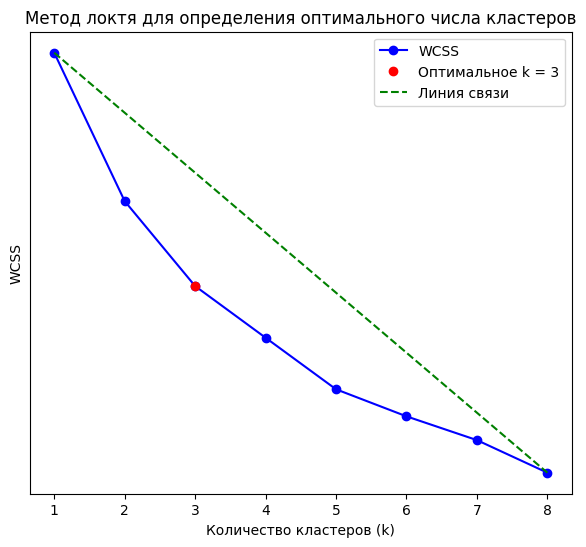

3

In [ ]:
elbow_method_with_max_distance(df_young, max_clusters=8)

In [ ]:
df_average.describe().T

count      mean       std       min       25%       50%  \
consnewareas      1116.0  0.004203  0.006273  0.000000  0.001071  0.002256   
popsize           1116.0  0.049948  0.101976  0.000508  0.010220  0.018700   
foodservturnover  1116.0  0.012057  0.049032  0.000000  0.000567  0.002945   
roadslen          1116.0  0.039263  0.038326  0.000000  0.013941  0.031538   
socialaid         1116.0  0.017792  0.021857  0.000000  0.003508  0.011507   
invest            1116.0  0.004726  0.021825  0.000000  0.000642  0.001392   
factoriescap      1116.0  0.008170  0.038993  0.000028  0.001036  0.002488   
cultureorg        1116.0  0.082587  0.142855  0.000000  0.006737  0.022190   
livarea           1116.0  0.015282  0.029653  0.000000  0.012416  0.014047   
sportsvenue       1116.0  0.255323  0.126706  0.000000  0.161880  0.230633   
beforeschool      1116.0  0.397184  0.107941  0.000000  0.323788  0.385556   
goodcompincome    1116.0  0.001609  0.005195  0.000000  0.000043  0.000305   
hospitals         1116.0  0.217436  0.156145  0.000000  0.096023  0.175904   
retailturnover    1116.0  0.116653  0.098773  0.000000  0.057593  0.095060   
harvest           1116.0  0.004561  0.066810  0.000000  0.000010  0.000022   
agrprod           1116.0  0.072350  0.085513  0.000000  0.006106  0.045251   
schoolnum         1116.0  0.126804  0.115059  0.000000  0.045421  0.097850   
avgsalary         1116.0  0.166060  0.130531  0.000000  0.082495  0.122869   

                       75%       max  
consnewareas      0.004401  0.059510  
popsize           0.041474  1.000000  
foodservturnover  0.009844  0.982804  
roadslen          0.051520  0.382800  
socialaid         0.024683  0.218479  
invest            0.003356  0.469791  
factoriescap      0.005668  0.996225  
cultureorg        0.095450  0.898995  
livarea           0.015791  1.000000  
sportsvenue       0.330014  0.768363  
beforeschool      0.462236  0.996963  
goodcompincome    0.001106  0.086098  
hospitals         0.311333  0.889455  
retailturnover    0.148333  1.000000  
harvest           0.000058  1.000000  
agrprod           0.109752  0.817166  
schoolnum         0.190681  0.907438  
avgsalary         0.202241  0.948487

In [ ]:
# PCA
pca_young = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_young)

df_young_n = df_young.copy()

df_young_n['PCA1'] = pca_result[:,0]
df_young_n['PCA2'] = pca_result[:,1]

In [ ]:
df_young.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 139 to 2000
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   consnewareas      98 non-null     float64
 1   popsize           98 non-null     float64
 2   foodservturnover  98 non-null     float64
 3   roadslen          98 non-null     float64
 4   socialaid         98 non-null     float64
 5   invest            98 non-null     float64
 6   factoriescap      98 non-null     float64
 7   cultureorg        98 non-null     float64
 8   livarea           98 non-null     float64
 9   sportsvenue       98 non-null     float64
 10  beforeschool      98 non-null     float64
 11  goodcompincome    98 non-null     float64
 12  hospitals         98 non-null     float64
 13  retailturnover    98 non-null     float64
 14  harvest           98 non-null     float64
 15  agrprod           98 non-null     float64
 16  schoolnum         98 non-null     float64
 17  

In [ ]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=42, n_init=20, max_iter=100)
cluster_labels = kmeans.fit_predict(df_young)
# Добавляем кластерные метки в DataFrame
df_young_n['Cluster'] = cluster_labels

In [ ]:
gmm_y = GaussianMixture(n_components=n, init_params='random', random_state=42)
cluster_labels = gmm_y.fit_predict(df_young)
df_young_n['Cluster'] = cluster_labels

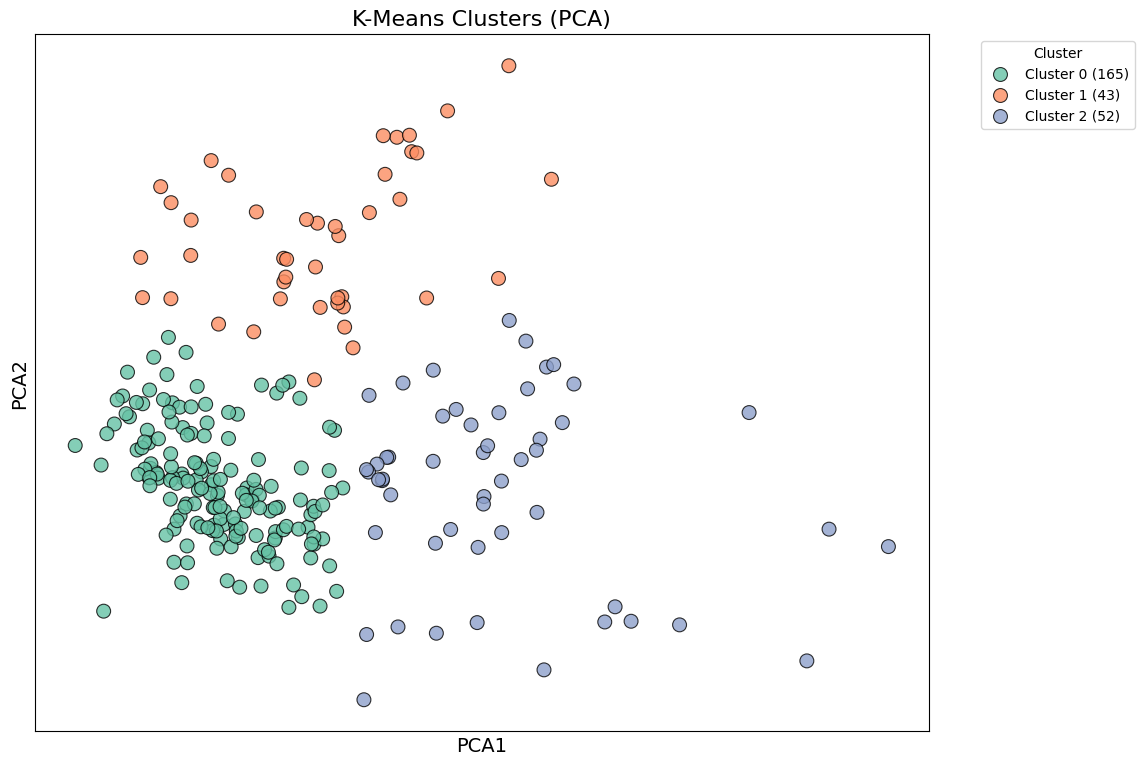

Silhouette Score is 0.315686841564016


In [ ]:
plot_clusters(df_young_n, 'PCA1', 'PCA2', 'Cluster', df_young, 'K-Means Clusters (PCA)')

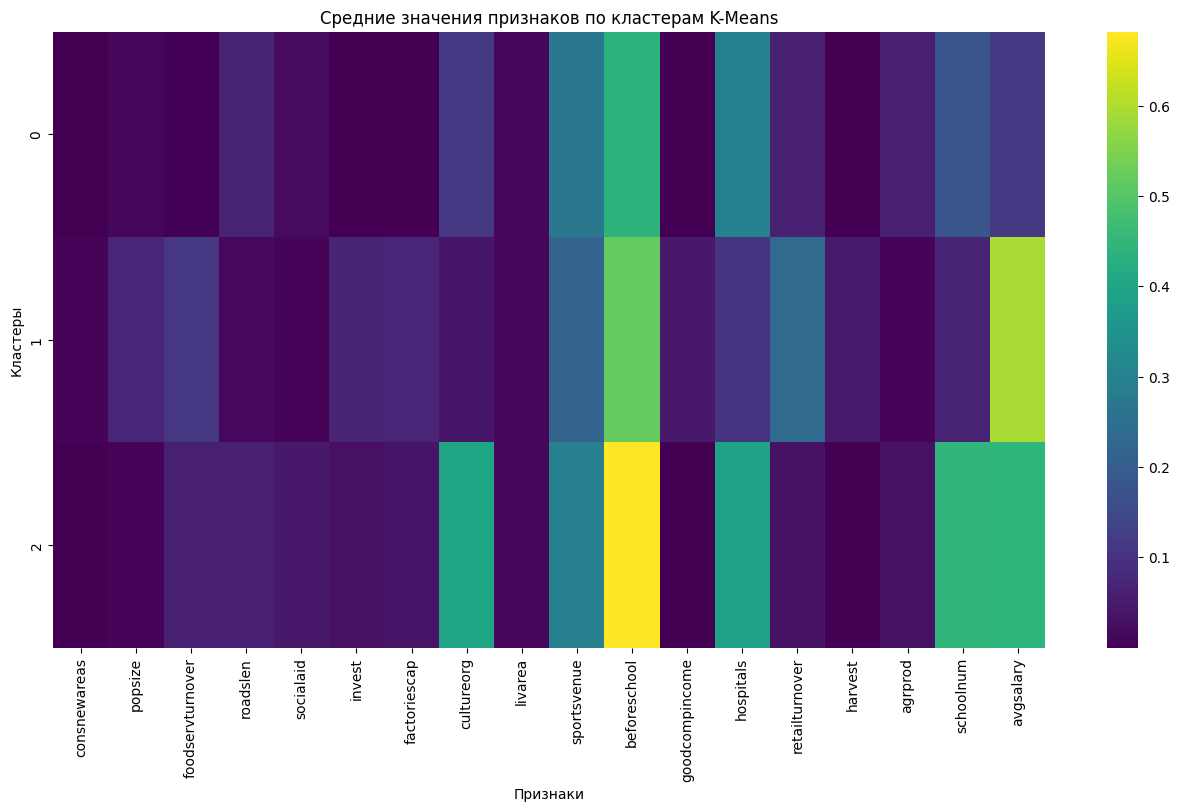

In [ ]:
# Heatmap средних значений по кластерам
cluster_means = df_young_n.groupby('Cluster').mean()
cluster_means = cluster_means.drop(['oktmo', 'PCA1', 'PCA2', 'tSNE1', 'tSNE2', 'Cluster_DB', 'Cluster_agg'], axis=1, errors='ignore')

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means,annot=False, cmap='viridis')
plt.title('Средние значения признаков по кластерам K-Means')
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.show()


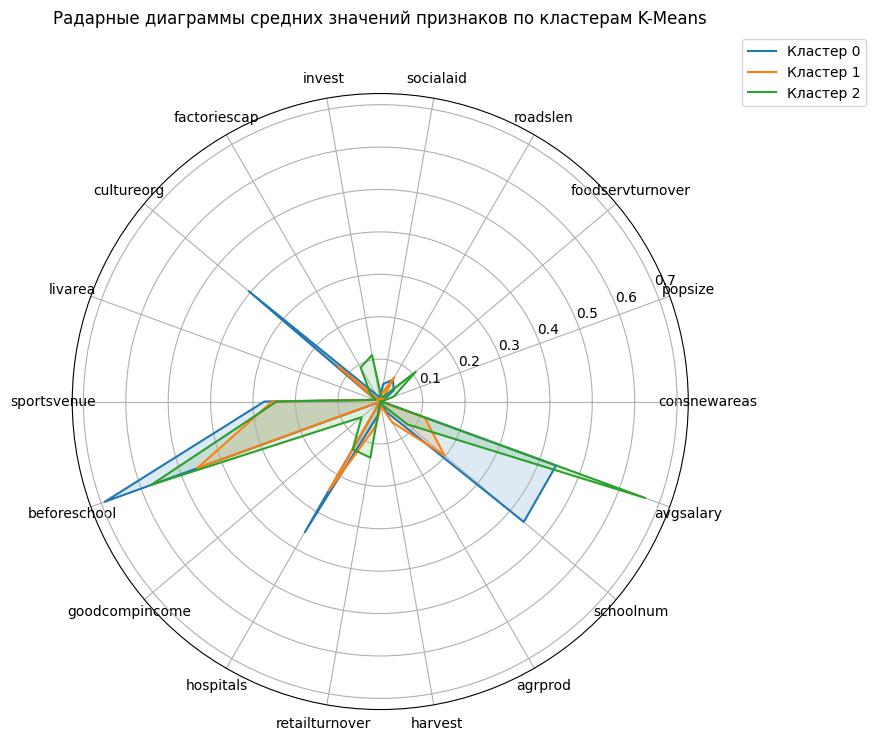

In [ ]:
# Подготовка данных
labels = df_young.columns
num_features = len(labels)

angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]  # закрытие графика

# Построение радарных диаграмм для каждого кластера
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for cluster in cluster_means.index:
    values = cluster_means.loc[cluster, labels].values.flatten().tolist()
    values += values[:1]  # закрытие графика
    ax.plot(angles, values, label=f'Кластер {cluster}')
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Радарные диаграммы средних значений признаков по кластерам K-Means', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

## Кластеризуем "средний" кластер

Оптимальное число кластеров по методу максимального расстояния: 3


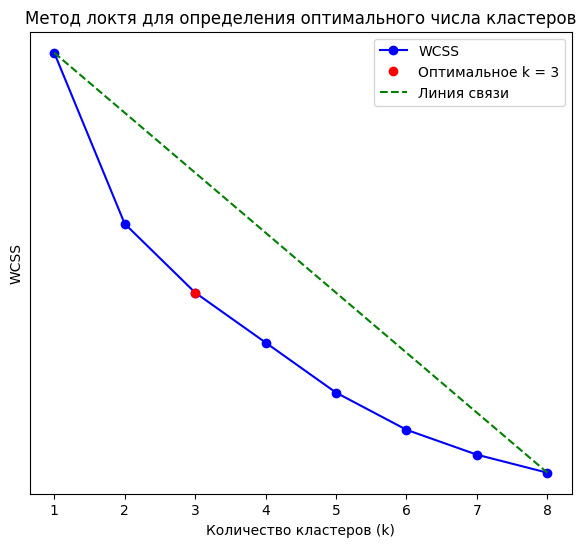

3

In [ ]:
elbow_method_with_max_distance(df_average, max_clusters=8)

In [ ]:
# PCA
pca_average = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_average)

df_average_n = df_average.copy()

df_average_n['PCA1'] = pca_result[:,0]
df_average_n['PCA2'] = pca_result[:,1]

In [ ]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=42, n_init=20, max_iter=100)
cluster_labels = kmeans.fit_predict(df_average)
# Добавляем кластерные метки в DataFrame
df_average_n['Cluster'] = cluster_labels

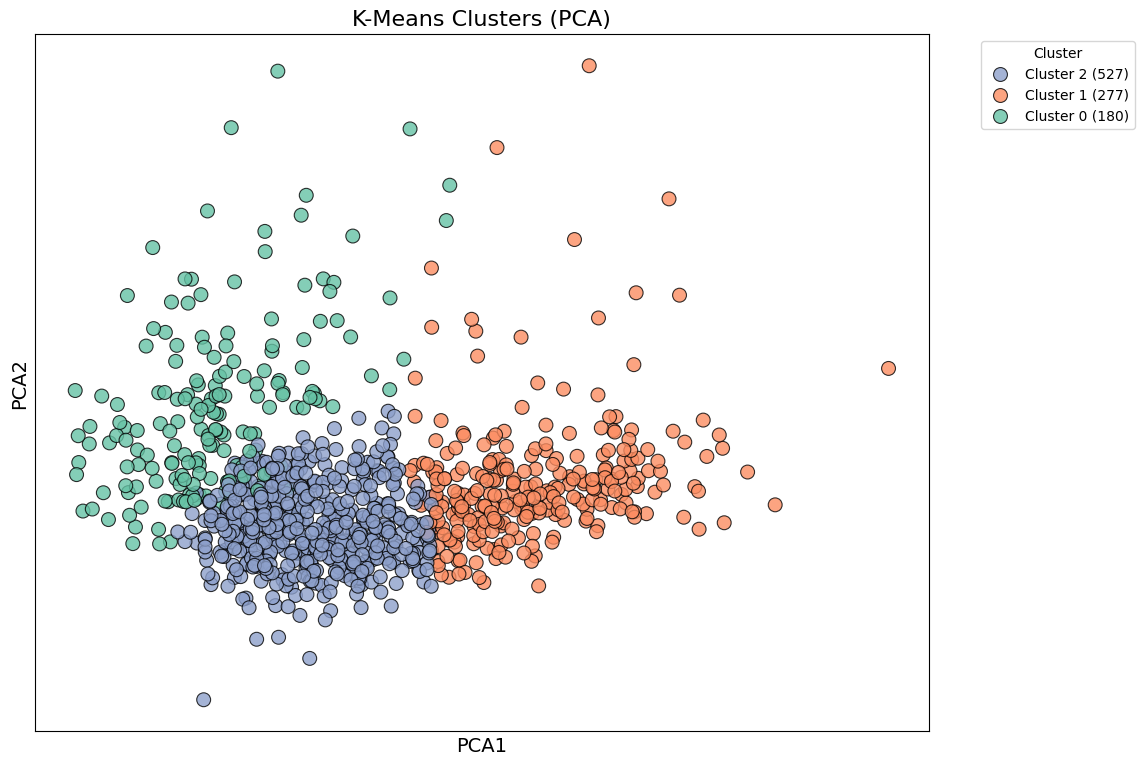

Silhouette Score is 0.22966417140823228


In [ ]:
plot_clusters(df_average_n, 'PCA1', 'PCA2', 'Cluster', df_average, 'K-Means Clusters (PCA)')

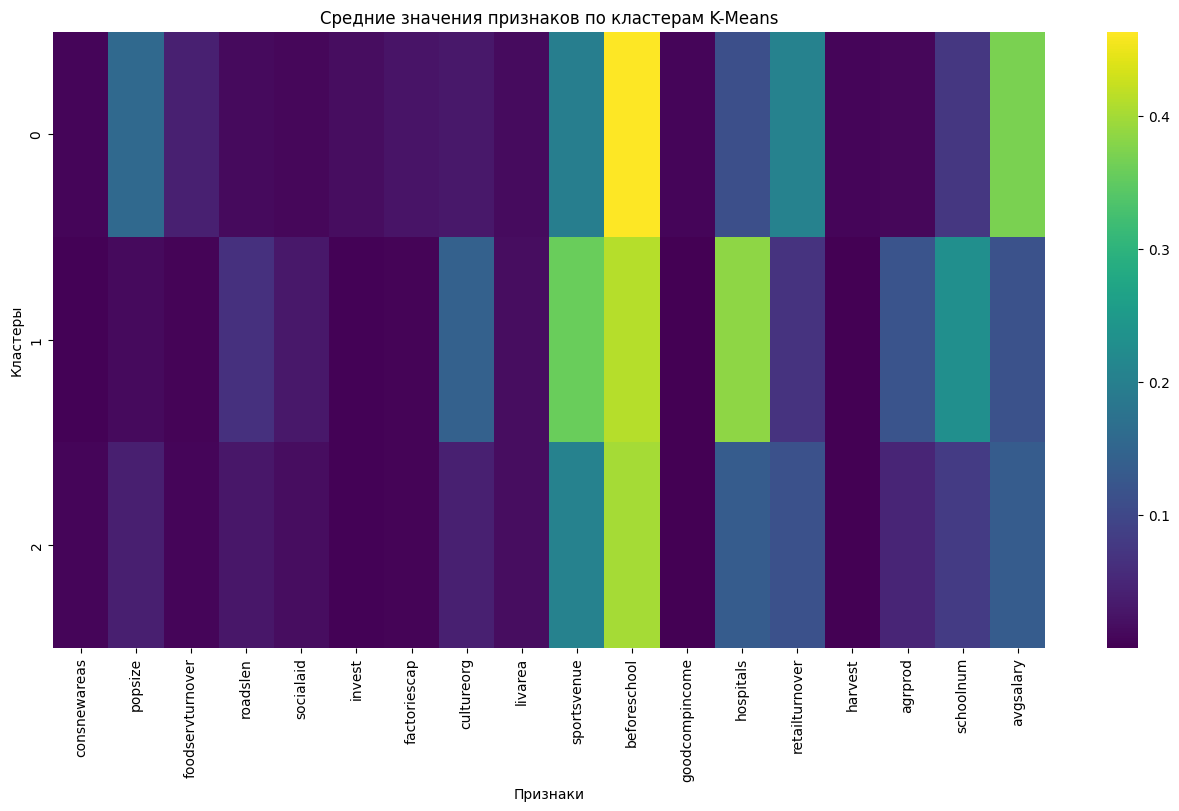

In [ ]:
# Heatmap средних значений по кластерам
cluster_means = df_average_n.groupby('Cluster').mean()
cluster_means = cluster_means.drop(['oktmo', 'PCA1', 'PCA2', 'tSNE1', 'tSNE2', 'Cluster_DB', 'Cluster_agg'], axis=1, errors='ignore')

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means,annot=False, cmap='viridis')
plt.title('Средние значения признаков по кластерам K-Means')
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.show()


## Кластеризуем "пожилой" кластер

Оптимальное число кластеров по методу максимального расстояния: 3


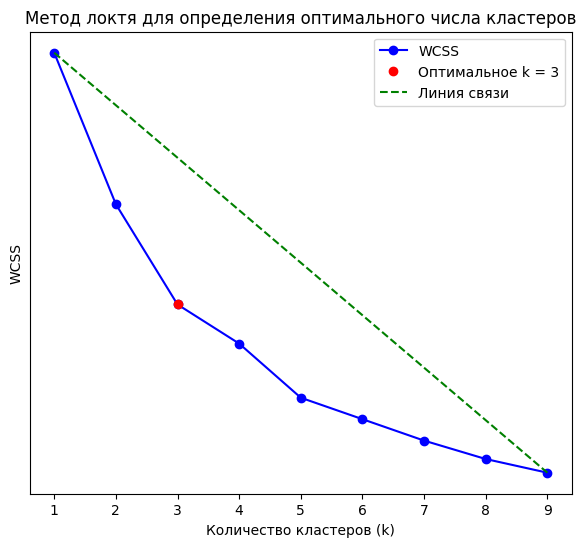

3

In [ ]:
elbow_method_with_max_distance(df_old, max_clusters=9)

In [ ]:
# PCA
pca_old = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_old)

df_old_n = df_old.copy()

df_old_n['PCA1'] = pca_result[:,0]
df_old_n['PCA2'] = pca_result[:,1]

In [ ]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=42, n_init=20, max_iter=100)
cluster_labels = kmeans.fit_predict(df_old)
# Добавляем кластерные метки в DataFrame
df_old_n['Cluster'] = cluster_labels

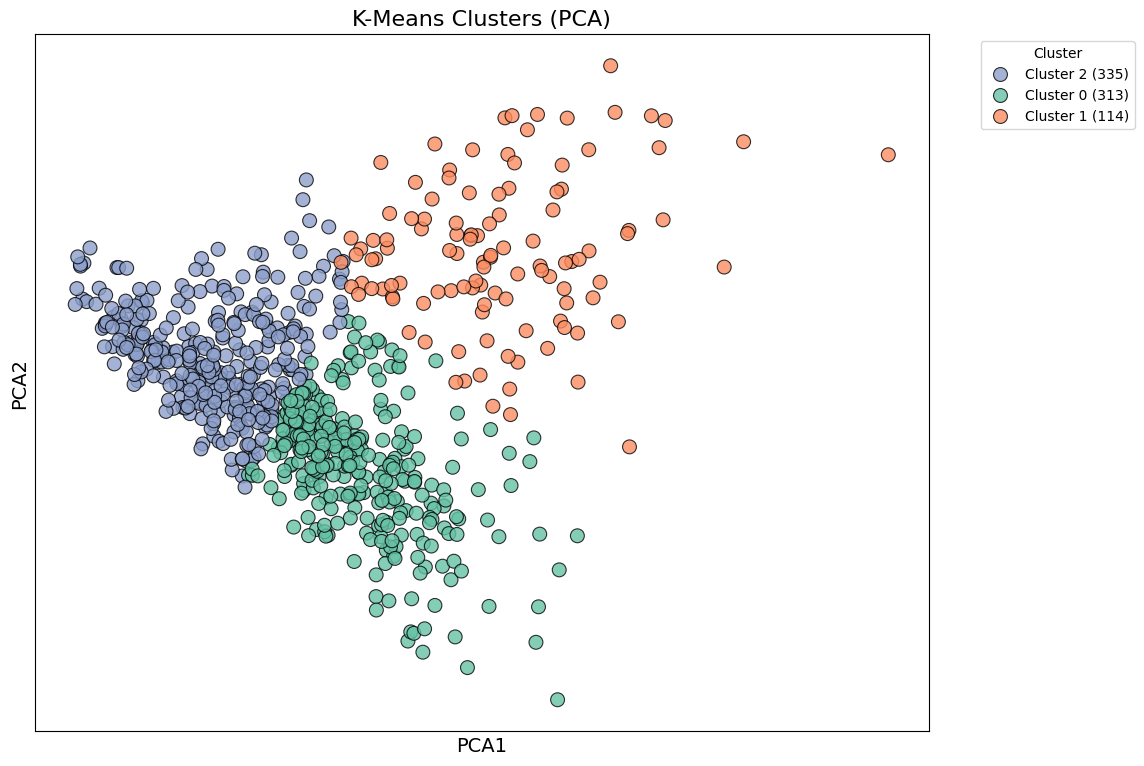

Silhouette Score is 0.21964017528396987


In [ ]:
plot_clusters(df_old_n, 'PCA1', 'PCA2', 'Cluster', df_old, 'K-Means Clusters (PCA)')

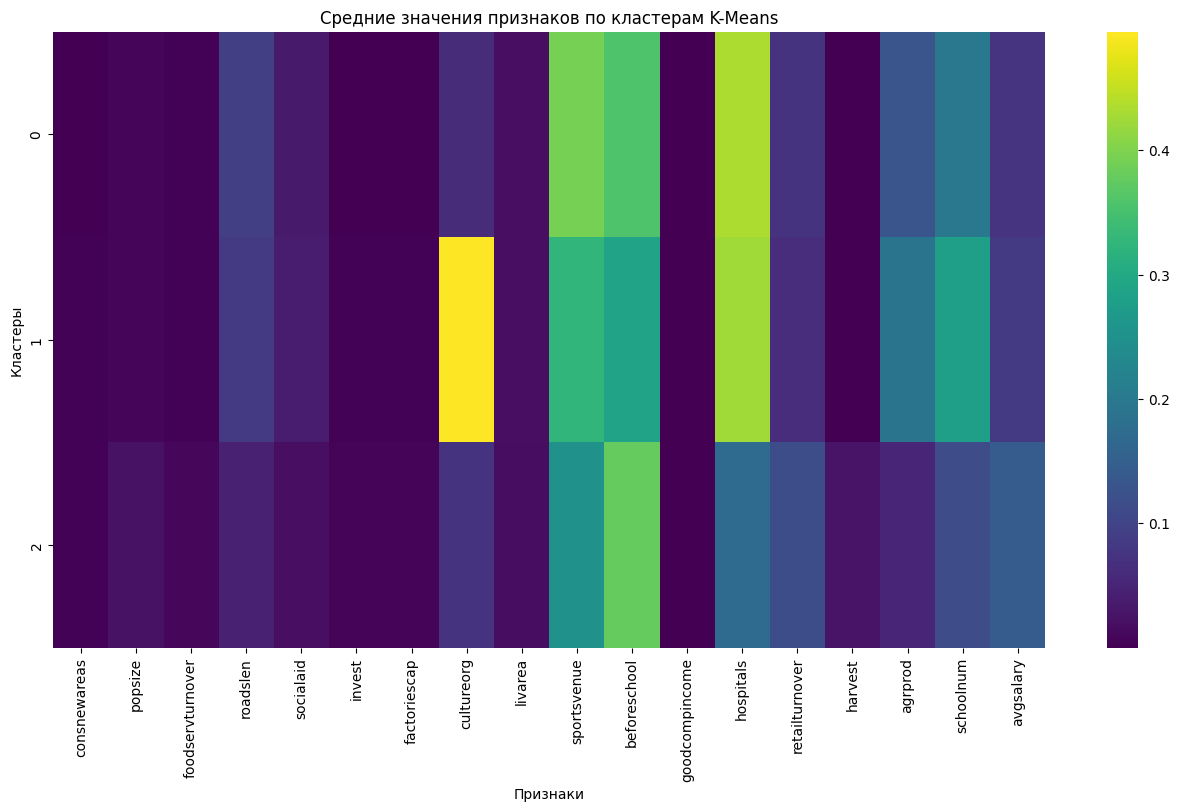

In [ ]:
# Heatmap средних значений по кластерам
cluster_means = df_old_n.groupby('Cluster').mean()
cluster_means = cluster_means.drop(['oktmo', 'PCA1', 'PCA2', 'tSNE1', 'tSNE2', 'Cluster_DB', 'Cluster_agg'], axis=1, errors='ignore')

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means,annot=False, cmap='viridis')
plt.title('Средние значения признаков по кластерам K-Means')
plt.xlabel('Признаки')
plt.ylabel('Кластеры')
plt.show()


# Clustering results

In [ ]:
df_old_n

consnewareas   popsize  foodservturnover  roadslen  socialaid    invest  \
0         0.000661  0.006071          0.000000  0.087321   0.000000  0.000383   
1         0.000484  0.007617          0.001310  0.072149   0.020704  0.000982   
3         0.000257  0.003959          0.000789  0.129991   0.036181  0.000124   
4         0.003296  0.018528          0.002022  0.102600   0.009097  0.000757   
6         0.000256  0.003797          0.000209  0.073991   0.037427  0.000411   
...            ...       ...               ...       ...        ...       ...   
1958      0.002137  0.013090          0.001948  0.056248   0.018936  0.000356   
1959      0.000554  0.008176          0.003207  0.062188   0.019434  0.000394   
1960      0.002163  0.006995          0.001420  0.057441   0.022328  0.000520   
1962      0.001347  0.018377          0.002345  0.016093   0.022919  0.000473   
1965      0.001615  0.015177          0.000877  0.012693   0.016483  0.000405   

      factoriescap  cultureorg   livarea  sportsvenue  ...  hospitals  \
0         0.000170    0.000000  0.013828     0.290376  ...   0.341978   
1         0.000662    0.026696  0.014119     0.361289  ...   0.525268   
3         0.000235    0.046653  0.015672     0.408182  ...   0.275382   
4         0.001141    0.011729  0.012227     0.235848  ...   0.200013   
6         0.000381    0.048259  0.017613     0.368825  ...   0.474767   
...            ...         ...       ...          ...  ...        ...   
1958      0.002287    0.016278  0.020611     0.452901  ...   0.427044   
1959      0.000441    0.025058  0.020034     0.472400  ...   0.509481   
1960      0.000749    0.028790  0.019714     0.479737  ...   0.509819   
1962      0.002056    0.011821  0.015507     0.279779  ...   0.046517   
1965      0.005374    0.014169  0.015852     0.242190  ...   0.037172   

      retailturnover   harvest   agrprod  schoolnum  avgsalary      PCA1  \
0           0.077257  0.000009  0.052762   0.000000   0.044897 -0.127591   
1           0.018049  0.000012  0.242787   0.349320   0.044372  0.214650   
3           0.036839  0.000009  0.182554   0.228922   0.057916  0.021696   
4           0.038532  0.000049  0.093457   0.124701   0.062457 -0.152386   
6           0.026195  0.000007  0.058947   0.157867   0.043670  0.045930   
...              ...       ...       ...        ...        ...       ...   
1958        0.073961  0.000066  0.058280   0.226311   0.066654  0.059727   
1959        0.045265  0.000051  0.110154   0.327891   0.026016  0.186149   
1960        0.044877  0.000020  0.074914   0.235449   0.031811  0.133239   
1962        0.135759  0.000015  0.003181   0.067670   0.060213 -0.326814   
1965        0.156044  0.000006  0.002360   0.069526   0.141283 -0.349559   

          PCA2  Cluster  global_cluster  
0    -0.130992        2               8  
1    -0.172489        0               6  
3    -0.080577        0               6  
4    -0.007469        2               8  
6    -0.187988        0               6  
...        ...      ...             ...  
1958 -0.191908        0               6  
1959 -0.221288        0               6  
1960 -0.242656        0               6  
1962  0.031270        2               8  
1965  0.066537        2               8  

[762 rows x 22 columns]

In [ ]:
combined['PCA1'] = pca_result[:,0]
combined['PCA2'] = pca_result[:,1]
combined = combined.drop(['Cluster', 'Sub_Cluster_Young', 'Sub_Cluster_Average', 'Sub_Cluster_Old', 'Cluster_with_count'], axis=1, errors='ignore')

In [ ]:
combined_clean = combined.drop(['PCA1', 'PCA2', 'global_cluster'], axis=1, errors='ignore')

In [ ]:
combined = pd.concat([combined, saldo], axis=1)

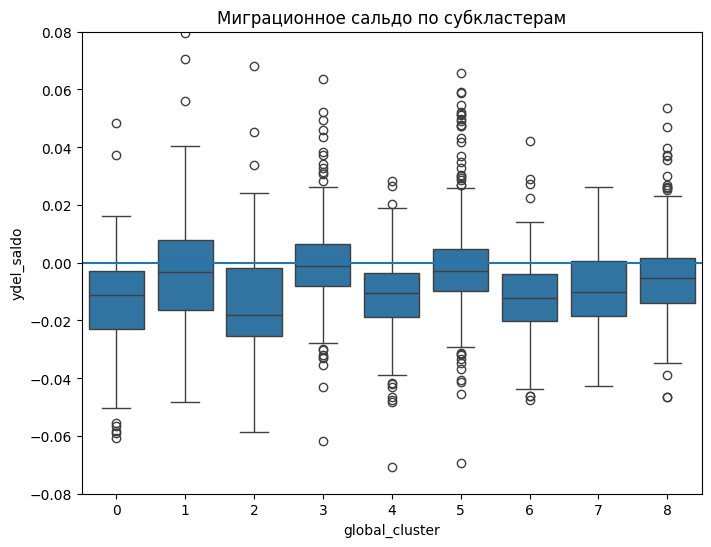

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='global_cluster', y='ydel_saldo', data=combined)
plt.title("Миграционное сальдо по субкластерам")
plt.ylim(-0.08,0.08)
plt.axhline(y=0)
plt.show()

/tmp/ipython-input-33-3301127274.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='global_cluster', y='ydel_saldo', data=combined,
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seabor

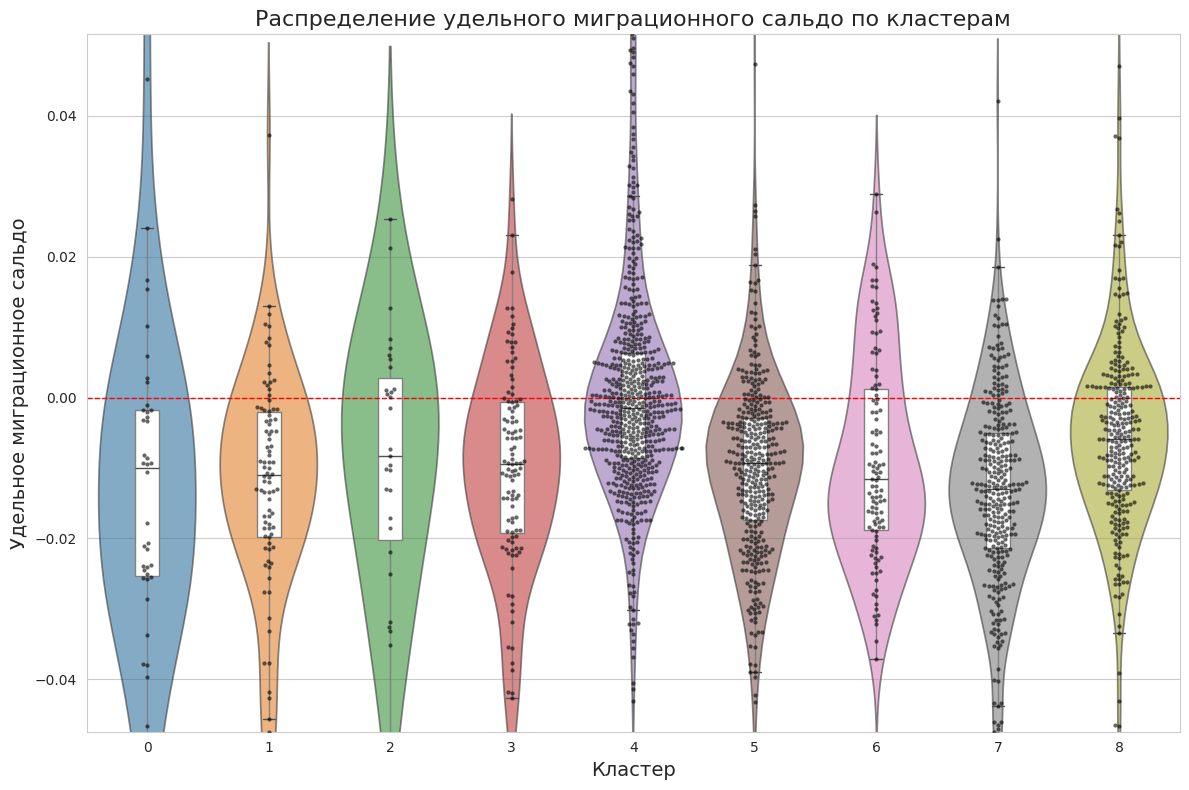

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

data_counts = combined['global_cluster'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
# Комбинируем violin + box + swarm
alpha_violin = 0.6
palette = sns.color_palette('tab10', n_colors=combined['global_cluster'].nunique())

# Violin plot
sns.violinplot(x='global_cluster', y='ydel_saldo', data=combined,
               inner=None, palette=palette, alpha=alpha_violin)
# Box plot
sns.boxplot(x='global_cluster', y='ydel_saldo', data=combined,
            width=0.2, showcaps=True, boxprops={'facecolor':'white', 'edgecolor':'gray'},
            showfliers=False, whiskerprops={'color':'gray'}, zorder=2)
# Swarm
sns.swarmplot(x='global_cluster', y='ydel_saldo', data=combined,
              size=3, color='black', alpha=0.6, zorder=3)

plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylim(combined['ydel_saldo'].quantile(0.01), combined['ydel_saldo'].quantile(0.99))
plt.title('Распределение удельного миграционного сальдо по кластерам', fontsize=16)
plt.xlabel('Кластер', fontsize=14)
plt.ylabel('Удельное миграционное сальдо', fontsize=14)
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

In [ ]:
data = pd.concat([combined, age_sex_df], axis=1)
data = data.drop(['PCA1', 'PCA2'], axis=1, errors='ignore')
profile = data.groupby('global_cluster')[
    socio_eco_feat + ['share_male_children','share_male_work','share_male_elderly',
                      'share_female_children','share_female_work','share_female_elderly']
].mean()

In [ ]:
profile

consnewareas   popsize  foodservturnover  roadslen  socialaid  \
global_cluster                                                                  
0                   0.002407  0.013020          0.004857  0.066011   0.020795   
1                   0.005952  0.070444          0.108566  0.014998   0.005864   
2                   0.002213  0.005370          0.059111  0.062919   0.045025   
3                   0.006299  0.155694          0.040367  0.012283   0.008491   
4                   0.002043  0.011180          0.004324  0.063505   0.029405   
5                   0.006297  0.038739          0.005635  0.028583   0.015670   
6                   0.001762  0.007708          0.003320  0.092515   0.034141   
7                   0.002136  0.007484          0.003284  0.082379   0.039113   
8                   0.003551  0.021482          0.008522  0.045678   0.019104   

                  invest  factoriescap  cultureorg   livarea  sportsvenue  \
global_cluster                                                              
0               0.002155      0.001598    0.109857  0.012949     0.272279   
1               0.067707      0.070814    0.038342  0.012174     0.217623   
2               0.028932      0.036576    0.398625  0.012991     0.295309   
3               0.015061      0.025116    0.029814  0.014230     0.196635   
4               0.002620      0.003704    0.142596  0.014812     0.357642   
5               0.002251      0.004098    0.041050  0.015577     0.206132   
6               0.001468      0.001801    0.060958  0.017741     0.391861   
7               0.002686      0.002721    0.495205  0.018057     0.323419   
8               0.003918      0.005436    0.072751  0.015759     0.248932   

                ...   harvest   agrprod  schoolnum  avgsalary  \
global_cluster  ...                                             
0               ...  0.000045  0.060917   0.178844   0.114637   
1               ...  0.046519  0.005851   0.067920   0.592308   
2               ...  0.000004  0.029542   0.446113   0.444195   
3               ...  0.005629  0.007710   0.072898   0.370676   
4               ...  0.000031  0.119720   0.228334   0.115984   
5               ...  0.000112  0.048779   0.079977   0.133482   
6               ...  0.000028  0.128678   0.198583   0.073930   
7               ...  0.000036  0.189760   0.278090   0.081902   
8               ...  0.026903  0.051397   0.113342   0.141879   

                share_male_children  share_male_work  share_male_elderly  \
global_cluster                                                             
0                          0.157428         0.324707            0.025498   
1                          0.135644         0.353649            0.016406   
2                          0.164588         0.316918            0.021137   
3                          0.126002         0.334614            0.022773   
4                          0.130729         0.337208            0.027626   
5                          0.127231         0.331773            0.025936   
6                          0.109831         0.352414            0.034723   
7                          0.106075         0.358370            0.033743   
8                          0.110915         0.346016            0.032141   

                share_female_children  share_female_work  share_female_elderly  
global_cluster                                                                  
0                            0.149137           0.265567              0.077663  
1                            0.128990           0.309947              0.055363  
2                            0.158029           0.273623              0.065704  
3                            0.118796           0.319280              0.078535  
4                            0.124330           0.294570              0.085537  
5                            0.121293           0.308876              0.084890  
6                            0.104705           0.294294              0.104

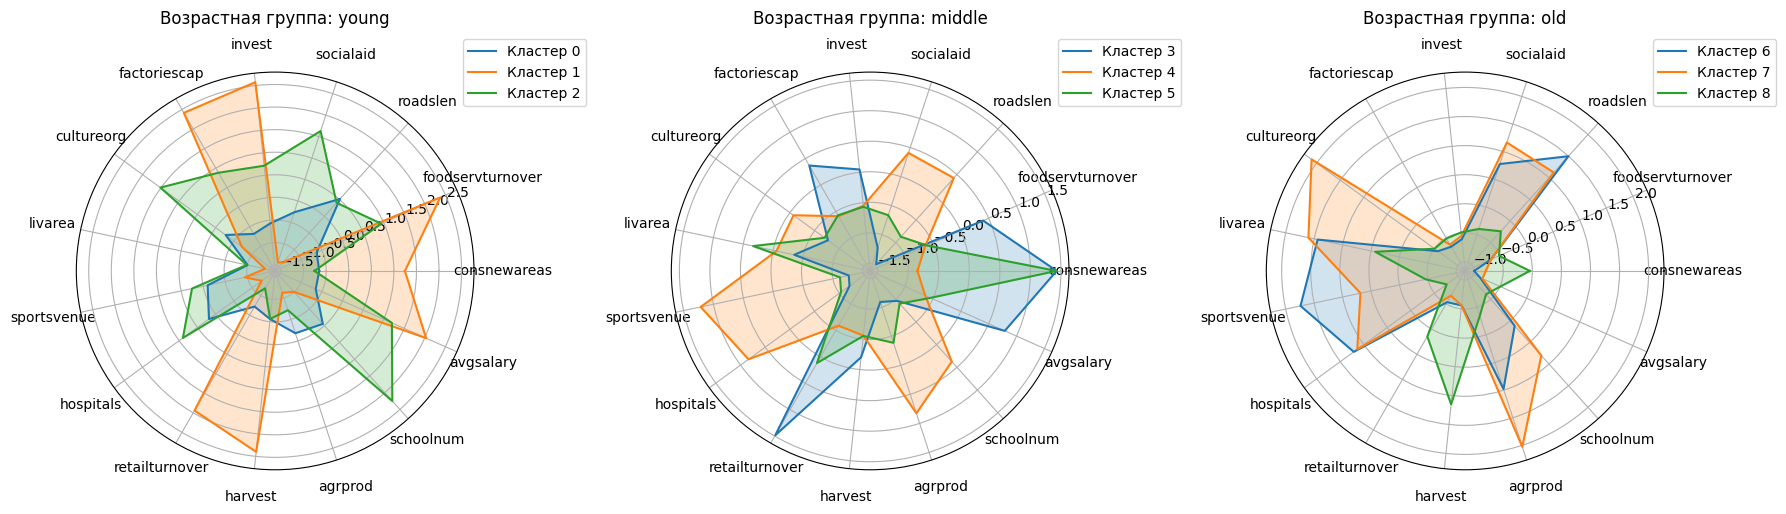

In [ ]:
age_group = {i: 'young' for i in range(3)}
age_group.update({i: 'middle' for i in range(3, 6)})
age_group.update({i: 'old' for i in range(6, 9)})

scaler = StandardScaler()
scaled_means = scaler.fit_transform(profile)
scaled_cm = pd.DataFrame(scaled_means, index=profile.index, columns=profile.columns)

selected_features = ['consnewareas', 'foodservturnover', 'roadslen', 'socialaid',
                     'invest', 'factoriescap', 'cultureorg', 'livarea',
                     'sportsvenue', 'hospitals', 'retailturnover', 'harvest',
                     'agrprod', 'schoolnum', 'avgsalary']
labels = selected_features
num_features = len(labels)
angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(polar=True))
groups = ['young', 'middle', 'old']
for ax, grp in zip(axes, groups):
    clusters_in_grp = [c for c, g in age_group.items() if g == grp]
    for cluster in clusters_in_grp:
        vals = scaled_cm.loc[cluster, labels].tolist() + [scaled_cm.loc[cluster, labels[0]]]
        ax.plot(angles, vals, label=f'Кластер {cluster}')
        ax.fill(angles, vals, alpha=0.2)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10)
    ax.tick_params(axis='x', pad=10)
    ax.set_title(f'Возрастная группа: {grp}', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

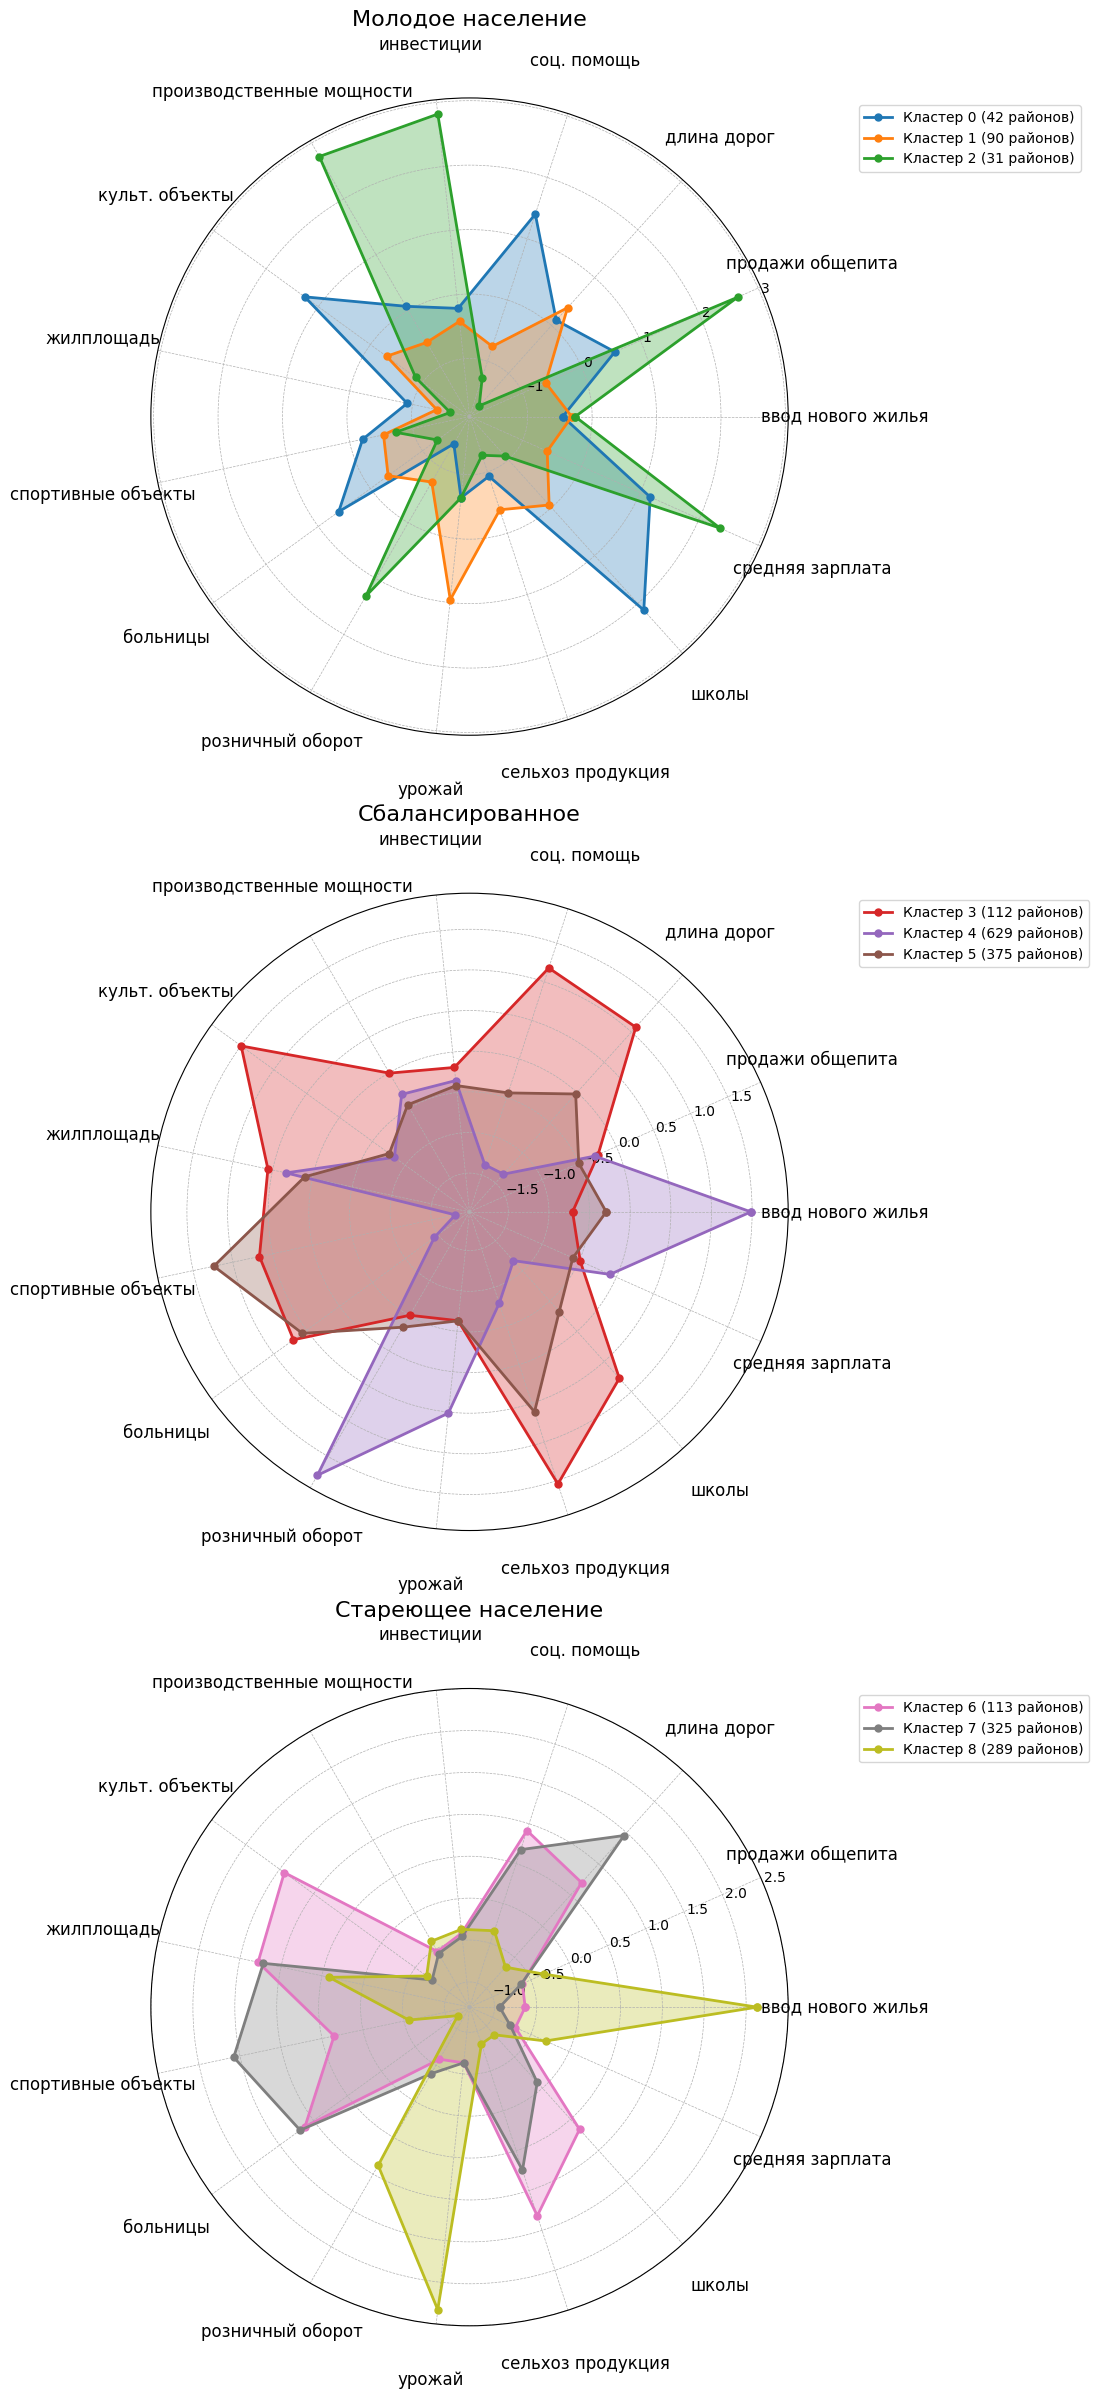

In [ ]:
import matplotlib.cm as mpl_cm
import warnings
from matplotlib import colormaps

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# Подсчет количества муниципальных районов в каждом кластере
data_counts = combined['global_cluster'].value_counts().sort_index()

# Стандартизация признаков
scaler = StandardScaler()
scaled_array = scaler.fit_transform(profile)
scaled_cm = pd.DataFrame(scaled_array, index=profile.index, columns=profile.columns)

selected_features = ['consnewareas', 'foodservturnover', 'roadslen', 'socialaid',
                     'invest', 'factoriescap', 'cultureorg', 'livarea',
                     'sportsvenue', 'hospitals', 'retailturnover', 'harvest',
                     'agrprod', 'schoolnum', 'avgsalary']
labels_rus = [
    'ввод нового жилья', 'продажи общепита', 'длина дорог', 'соц. помощь',
    'инвестиции', 'производственные мощности', 'культ. объекты', 'жилплощадь',
    'спортивные объекты', 'больницы', 'розничный оборот', 'урожай',
    'сельхоз продукция', 'школы', 'средняя зарплата'
]

angles = np.linspace(0, 2 * np.pi, len(labels_rus), endpoint=False).tolist()
angles += angles[:1]

# Цветовая палитра
palette = plt.get_cmap('tab10')

# Рисуем диаграммы друг под другом
fig, axes = plt.subplots(3, 1, figsize=(12, 24), subplot_kw=dict(polar=True))
age_labels_rus = {'young': 'Молодое население', 'middle': 'Сбалансированное', 'old': 'Стареющее население'}
groups = ['young', 'middle', 'old']

for ax, grp in zip(axes, groups):
    clusters = [c for c, g in age_group.items() if g == grp]
    for cluster in clusters:
        vals = scaled_cm.loc[cluster, selected_features].tolist()
        vals += [vals[0]]
        col = palette(cluster % palette.N)
        cnt = data_counts.loc[cluster]
        ax.plot(angles, vals,
                label=f'Кластер {cluster} ({cnt} районов)',
                linewidth=2, marker='o', markersize=5, color=col)
        ax.fill(angles, vals, alpha=0.3, color=col)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels_rus, fontsize=12)
    ax.tick_params(axis='x', pad=30)
    ax.set_title(age_labels_rus[grp], y=1.1, fontsize=16)
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0), fontsize=10)

plt.tight_layout()
plt.show()


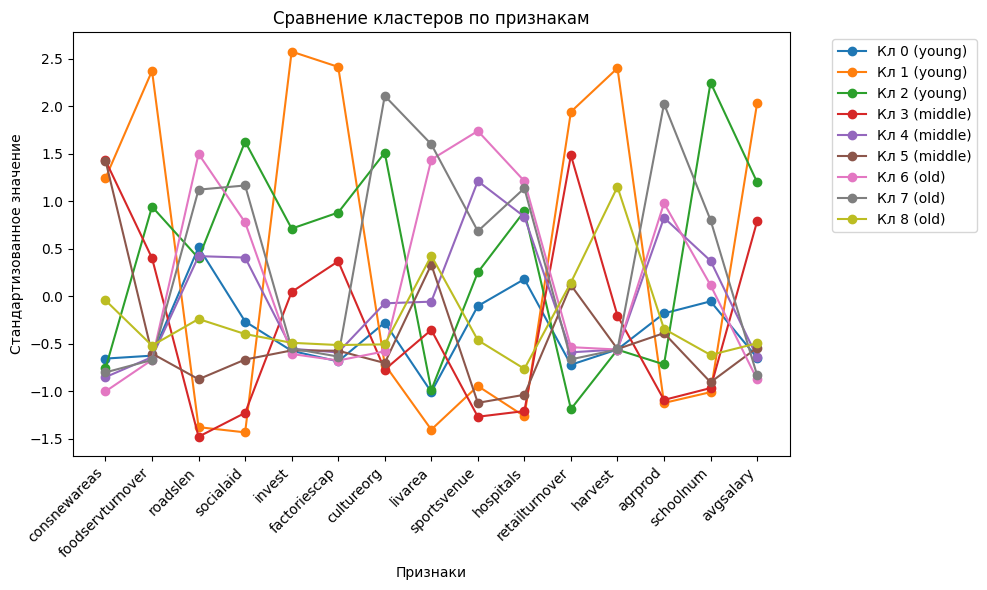

In [ ]:
# Линейный график для всех кластеров
plt.figure(figsize=(10, 6))
for cluster in scaled_cm.index:
    grp = age_group[cluster]
    plt.plot(labels, scaled_cm.loc[cluster, labels], marker='o', label=f'Кл {cluster} ({grp})')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Признаки')
plt.ylabel('Стандартизованное значение')
plt.title('Сравнение кластеров по признакам')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Разделение на +/- сальдо

In [ ]:
combined

consnewareas   popsize  foodservturnover  roadslen  socialaid    invest  \
0         0.000661  0.006071          0.000000  0.087321   0.000000  0.000383   
1         0.000484  0.007617          0.001310  0.072149   0.020704  0.000982   
2         0.004630  0.015168          0.001915  0.065813   0.010995  0.001528   
3         0.000257  0.003959          0.000789  0.129991   0.036181  0.000124   
4         0.003296  0.018528          0.002022  0.102600   0.009097  0.000757   
...            ...       ...               ...       ...        ...       ...   
2001      0.000074  0.008543          0.000408  0.074301   0.018682  0.008237   
2002      0.000103  0.013495          0.015516  0.048879   0.012270  0.004983   
2003      0.000116  0.003724          0.000397  0.095727   0.038007  0.000706   
2004      0.002780  0.012626          0.001659  0.060042   0.013056  0.006365   
2005      0.001295  0.041015          0.018365  0.005986   0.008440  0.004012   

      factoriescap  cultureorg   livarea  sportsvenue  ...  hospitals  \
0         0.000170    0.000000  0.013828     0.290376  ...   0.341978   
1         0.000662    0.026696  0.014119     0.361289  ...   0.525268   
2         0.000489    0.014177  0.011596     0.223424  ...   0.139474   
3         0.000235    0.046653  0.015672     0.408182  ...   0.275382   
4         0.001141    0.011729  0.012227     0.235848  ...   0.200013   
...            ...         ...       ...          ...  ...        ...   
2001      0.000421    0.048178  0.012955     0.373549  ...   0.363377   
2002      0.012103    0.126567  0.011742     0.359112  ...   0.197149   
2003      0.000290    0.196029  0.013003     0.265712  ...   0.417845   
2004      0.002014    0.117839  0.013828     0.244087  ...   0.132491   
2005      0.001284    0.010883  0.012470     0.124010  ...   0.167740   

      retailturnover   harvest   agrprod  schoolnum  avgsalary      PCA1  \
0           0.077257  0.000009  0.052762   0.000000   0.044897 -1.122932   
1           0.018049  0.000012  0.242787   0.349320   0.044372 -1.163759   
2           0.082908  0.000042  0.057246   0.139132   0.047468  0.876503   
3           0.036839  0.000009  0.182554   0.228922   0.057916 -1.159787   
4           0.038532  0.000049  0.093457   0.124701   0.062457 -1.127377   
...              ...       ...       ...        ...        ...       ...   
2001        0.003357  0.000010  0.060132   0.275804   0.128774 -0.048149   
2002        0.038963  0.000010  0.012757   0.168201   0.307157  0.898751   
2003        0.000000  0.000008  0.108179   0.160315   0.117638  0.938745   
2004        0.000526  0.000032  0.025698   0.178974   0.276979  0.892284   
2005        0.243629  0.000014  0.003343   0.062303   0.220647  0.927591   

          PCA2  global_cluster  ydel_saldo  
0     0.244202               8   -0.020139  
1     0.146886               6   -0.016912  
2    -0.006119               5    0.017850  
3     0.105050               6   -0.033594  
4     0.196716               8   -0.015099  
...        ...             ...         ...  
2001  0.434270               0   -0.017899  
2002  0.135027               5   -0.005605  
2003  0.260291               4   -0.018405  
2004 -0.059777               5   -0.001336  
2005 -0.053653               5   -0.020567  

[2006 rows x 22 columns]

In [ ]:
combined_clsf = combined.drop(['PCA1', 'PCA2', 'Cluster', 'Sub_Cluster_Young', 'Sub_Cluster_Average', 'Sub_Cluster_Old'], axis=1, errors='ignore')
#combined_clsf = pd.concat([combined_clsf, saldo], axis=1)
combined_clsf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 0 to 2005
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   consnewareas      2006 non-null   float64
 1   popsize           2006 non-null   float64
 2   foodservturnover  2006 non-null   float64
 3   roadslen          2006 non-null   float64
 4   socialaid         2006 non-null   float64
 5   invest            2006 non-null   float64
 6   factoriescap      2006 non-null   float64
 7   cultureorg        2006 non-null   float64
 8   livarea           2006 non-null   float64
 9   sportsvenue       2006 non-null   float64
 10  beforeschool      2006 non-null   float64
 11  goodcompincome    2006 non-null   float64
 12  hospitals         2006 non-null   float64
 13  retailturnover    2006 non-null   float64
 14  harvest           2006 non-null   float64
 15  agrprod           2006 non-null   float64
 16  schoolnum         2006 non-null   float64
 17  

In [ ]:
combined_clsf['saldo_sign'] = combined_clsf['ydel_saldo'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Выработка численных рекомендаций

In [ ]:
combined_clsf['oktmo'] = df['oktmo']
combined_clsf['name'] = df['name']

In [ ]:
combined_clsf.to_csv('feat&name&oktmo.csv', index=False)

In [ ]:
orig = pd.read_csv('result.csv', header=0, sep=',', quotechar='"')

# Фильтруем только 2022 год
orig2022 = orig.loc[orig['year'] == 2022].copy()

# Выбираем 7 базовых признаков для описания региона
baseline_feats = [
    'popsize',
    'avgsalary',
    'invest',
    'retailturnover',
    'hospitals',
    'factoriescap',
    'consnewareas'
]

# Оставляем в orig2022 только oktmo + выбранные признаки
orig_base = orig2022[['oktmo'] + baseline_feats]
orig_base.rename(
    columns={feat: f"{feat}_orig" for feat in baseline_feats},
    inplace=True
)
# Копируем combined_clsf и «склеиваем» с исходными данными по oktmo
combined_ext = combined_clsf.copy()
combined_ext = combined_ext.merge(
    orig_base,
    on='oktmo',
    how='left'
)
combined_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   consnewareas         2006 non-null   float64
 1   popsize              2006 non-null   float64
 2   foodservturnover     2006 non-null   float64
 3   roadslen             2006 non-null   float64
 4   socialaid            2006 non-null   float64
 5   invest               2006 non-null   float64
 6   factoriescap         2006 non-null   float64
 7   cultureorg           2006 non-null   float64
 8   livarea              2006 non-null   float64
 9   sportsvenue          2006 non-null   float64
 10  beforeschool         2006 non-null   float64
 11  goodcompincome       2006 non-null   float64
 12  hospitals            2006 non-null   float64
 13  retailturnover       2006 non-null   float64
 14  harvest              2006 non-null   float64
 15  agrprod              2006 non-null   f

/tmp/ipython-input-537424004.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig_base.rename(


In [ ]:
per_capita_cols = ['hospitals_orig', 'retailturnover_orig', 'invest_orig', 'consnewareas_orig', 'factoriescap_orig']
for col in per_capita_cols:
    combined_ext[col] = combined_ext[col] / combined_ext['popsize_orig']

In [ ]:
combined_ext.to_csv('feat&name&oktmo&origfeat.csv', index=False)

    df            — полный combined_clsf со столбцом 'global_cluster' и 'ydel_saldo'
    cluster_id    — номер глобального кластера (0–8)
    region_idx    — индекс региона в df; если None, возьмём первый с ydel_saldo<=0
    features      — список socio-eco признаков
    k_neighbors   — число соседей для поиска
    top_k         — число топ-рекомендаций

Регион 21 (кластер 4) — рекомендации на основе соседей [389, 1676, 1011, 1460, 374]:
| feature          |   region_value |   neighbors_mean |      delta |   percent_increase |
|:-----------------|---------------:|-----------------:|-----------:|-------------------:|
| schoolnum        |    0.119141    |       0.13844    | 0.0192994  |               16.2 |
| cultureorg       |    0.0182102   |       0.0224477  | 0.00423756 |               23.3 |
| consnewareas     |    0.000799812 |       0.00491073 | 0.00411091 |              514   |
| foodservturnover |    0.0013303   |       0.00466967 | 0.00333937 |              251   |
| invest           |    0.000234972 |       0.00163354 | 0.00139857 |              595.2 |


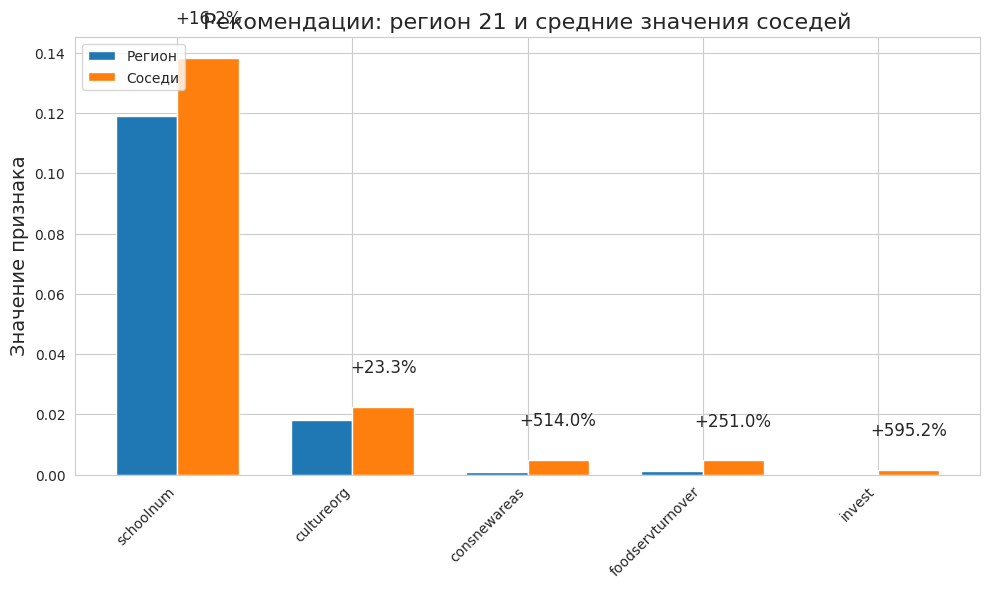

In [ ]:
from sklearn.neighbors import NearestNeighbors

def recommend_from_neighbors(df, cluster_id, region_idx=None,
                             features=None, k_neighbors=5, top_k=5):
    sub = df[df['global_cluster']==cluster_id].copy()
    if region_idx is None or region_idx not in sub.index:
        negs = sub[sub['ydel_saldo']<=0]
        if negs.empty:
            raise ValueError("В кластере нет регионов с отрицательным сальдо")
        region_idx = negs.index[0]

    Xs = sub[features]
    pos_idx = sub[sub['ydel_saldo']>0].index
    neigh = NearestNeighbors(n_neighbors=min(k_neighbors, len(pos_idx)))
    neigh.fit(Xs.loc[pos_idx])
    dist, inds = neigh.kneighbors(Xs.loc[[region_idx]])
    neigh_idx = Xs.loc[pos_idx].iloc[inds[0]].index

    neigh_mean = Xs.loc[neigh_idx].mean()
    region_vals = Xs.loc[region_idx]
    delta = (neigh_mean - region_vals).sort_values(ascending=False)

    rec = pd.DataFrame({
        'feature': delta.index[:top_k],
        'region_value': region_vals[delta.index[:top_k]].values,
        'neighbors_mean': neigh_mean[delta.index[:top_k]].values,
        'delta': delta.values[:top_k]
    })
    rec['percent_increase'] = np.where(
        rec['region_value'] != 0,
        (rec['delta'] / rec['region_value'] * 100).round(1),
        np.nan
    )
    return region_idx, neigh_idx.tolist(), rec

socio_eco = [
    'consnewareas','foodservturnover','roadslen','socialaid',
    'invest','factoriescap','cultureorg','livarea','sportsvenue',
    'hospitals','retailturnover','harvest','agrprod','schoolnum','avgsalary'
]
cluster_id = 4
region, neighbors, recommendations = recommend_from_neighbors(
    combined, cluster_id, features=socio_eco, k_neighbors=5, top_k=5
)

# Печать таблицы рекомендаций
print(f"Регион {region} (кластер {cluster_id}) — рекомендации на основе соседей {neighbors}:")
print(recommendations.to_markdown(index=False))

# Визуализация рекомендаций
features = recommendations['feature']
reg_vals = recommendations['region_value']
neigh_vals = recommendations['neighbors_mean']
percent = recommendations['percent_increase']

x = np.arange(len(features))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, reg_vals, width, label='Регион'),
ax.bar(x + width/2, neigh_vals, width, label='Соседи'),

# Добавление текста с процентным приростом
for i in x:
    ax.text(i + width/2, neigh_vals[i] + 0.01, f"+{percent[i]}%", ha='center', va='bottom', fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.set_ylabel('Значение признака', fontsize=14)
ax.set_title(f'Рекомендации: регион {region} и средние значения соседей', fontsize=16)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Эксперименты с СППР

In [ ]:
from sklearn.neighbors import NearestNeighbors

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def recommend_from_neighbors(df, cluster_id, region_idx=None,
                             features=None, k_neighbors=5, top_k=5):
    # 1) фильтруем по кластеру
    sub = df[df['global_cluster'] == cluster_id].copy()
    if region_idx is None or region_idx not in sub.index:
        negs = sub[sub['ydel_saldo'] <= 0]
        if negs.empty:
            raise ValueError("В кластере нет регионов с отрицательным сальдо")
        region_idx = negs.index[0]

    # 2) нормализация признаков внутри кластера
    X = sub[features]
    scaler = MinMaxScaler()
    Xs = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=features)

    # 3) деление на положительное/отрицательное
    pos_idx = sub[sub['ydel_saldo'] > 0].index

    # 4) k ближайших «позитивных» соседей
    neigh = NearestNeighbors(n_neighbors=min(k_neighbors, len(pos_idx)), metric='euclidean')
    neigh.fit(Xs.loc[pos_idx])
    _, inds = neigh.kneighbors(Xs.loc[[region_idx]])
    neigh_idx = Xs.loc[pos_idx].iloc[inds[0]].index.tolist()

    # 5) расчёт delta для всех признаков
    neigh_mean  = Xs.loc[neigh_idx].mean()
    region_vals = Xs.loc[region_idx]
    delta       = neigh_mean - region_vals

    # 6) собираем в таблицу все признаки
    rec = pd.DataFrame({
        'feature':         features,
        'region_value':    region_vals.values,
        'neighbors_mean':  neigh_mean.values,
        'delta':           delta.values
    })

    # 7) процентное изменение
    rec['percent_change'] = np.where(
        rec['region_value'] != 0,
        rec['delta'] / rec['region_value'] * 100,
        np.nan
    )

    # 8) направление
    rec['direction'] = np.where(rec['delta']>0, 'увеличить', 'уменьшить')

    # 9) абсолютное процентное изменение для сортировки
    rec['abs_pct'] = rec['percent_change'].abs()

    # 10) берём top_k по abs_pct
    rec = rec.sort_values(by='abs_pct', ascending=False).head(top_k).reset_index(drop=True)

    # 11) форматируем числа до 2 значимых цифр
    for col in ['region_value','neighbors_mean','delta']:
        rec[col] = rec[col].apply(lambda x: f"{x:.2g}")

    # 12) приводим percent_change и abs_pct к 1 знаку после запятой
    rec['percent_change'] = rec['percent_change'].round(1)
    rec['abs_pct']        = rec['abs_pct'].round(1)

    # 13) добавляем oktmo и name
    rec.insert(0, 'Имя', df.loc[region_idx, 'name'])
    rec.insert(1, 'oktmo', df.loc[region_idx, 'oktmo'])

    # убираем вспомогательный столбец
    rec.drop(columns='abs_pct', inplace=True)

    return region_idx, neigh_idx, rec

socio_eco = [
    'consnewareas','popsize','foodservturnover','roadslen','socialaid',
    'invest','factoriescap','cultureorg','livarea','sportsvenue',
    'beforeschool','goodcompincome','hospitals','retailturnover',
    'harvest','agrprod','schoolnum','avgsalary'
]

cluster_id = 6
region, neighbors, recommendations = recommend_from_neighbors(
    combined_ext, cluster_id,
    region_idx=None,
    features=socio_eco,
    k_neighbors=5,
    top_k=7
)

print(f"Регион {recommendations.loc[0,'Имя']} (oktmo={region}), кластер {cluster_id}")
print("Соседи:", neighbors)
print(recommendations.to_markdown(index=False))

Регион Егорьевский муниципальный район (oktmo=9), кластер 6
Соседи: [43, 1101, 1001, 998, 1474]
| Имя                             |   oktmo | feature        |   region_value |   neighbors_mean |   delta |   percent_change | direction   |
|:--------------------------------|--------:|:---------------|---------------:|-----------------:|--------:|-----------------:|:------------|
| Егорьевский муниципальный район | 1609000 | goodcompincome |          0.023 |            0.11  |   0.083 |            367.5 | увеличить   |
| Егорьевский муниципальный район | 1609000 | factoriescap   |          0.013 |            0.045 |   0.032 |            237.2 | увеличить   |
| Егорьевский муниципальный район | 1609000 | invest         |          0.012 |            0.025 |   0.013 |            108.2 | увеличить   |
| Егорьевский муниципальный район | 1609000 | avgsalary      |          0.058 |            0.11  |   0.056 |             96.2 | увеличить   |
| Егорьевский муниципальный район | 1609000 | consne

In [ ]:
def display_recommendations_and_baseline(recommendations, combined_ext, region_idx, baseline_feats):
    # Отображаем рекомендации
    print("Рекомендации:\n")
    display(recommendations)

    # Собираем baseline_orig значения для региона
    baseline_orig_cols = [f"{feat}_orig" for feat in baseline_feats]
    baseline_values = combined_ext.loc[region_idx, baseline_orig_cols]
    baseline_df = pd.DataFrame({
        'feature': baseline_feats,
        'value_orig': baseline_values.values
    })

    print("\n### Базовые показатели (orig) выбранного региона:\n")
    display(baseline_df)

baseline_feats = [
    'popsize',
    'avgsalary',
    'invest',
    'retailturnover',
    'hospitals',
    'consnewareas',
    'factoriescap',
    'poorhousesdwellers'
]

display_recommendations_and_baseline(recommendations, combined_ext, region, baseline_feats)

Рекомендации:



Имя    oktmo         feature region_value  \
0  Егорьевский муниципальный район  1609000  goodcompincome        0.023   
1  Егорьевский муниципальный район  1609000    factoriescap        0.013   
2  Егорьевский муниципальный район  1609000          invest        0.012   
3  Егорьевский муниципальный район  1609000       avgsalary        0.058   
4  Егорьевский муниципальный район  1609000    consnewareas        0.018   
5  Егорьевский муниципальный район  1609000       socialaid         0.12   
6  Егорьевский муниципальный район  1609000      cultureorg        0.076   

  neighbors_mean  delta  percent_change  direction  
0           0.11  0.083           367.5  увеличить  
1          0.045  0.032           237.2  увеличить  
2          0.025  0.013           108.2  увеличить  
3           0.11  0.056            96.2  увеличить  
4          0.035  0.016            89.0  увеличить  
5           0.22  0.096            77.8  увеличить  
6           0.13   0.05            66.5  увеличить


### Базовые показатели (orig) выбранного региона:



feature value_orig
0             popsize    11911.0
1           avgsalary    32494.9
2              invest  23.246999
3      retailturnover  31.086794
4           hospitals   0.001091
5        consnewareas   0.059861
6        factoriescap  62.666695
7  poorhousesdwellers        NaN

In [ ]:
def cluster_baseline_means(df, baseline_feats):

    # Группируем по global_cluster и считаем среднее
    means = (df
             .groupby('global_cluster')[baseline_feats]
             .mean()
             .reset_index())
    return means

cluster_means_df = cluster_baseline_means(combined_ext, baseline_feats)
print(cluster_means_df.to_markdown(index=False))

|   global_cluster |   popsize_orig |   avgsalary_orig |   invest_orig |   retailturnover_orig |   hospitals_orig |   factoriescap_orig |   consnewareas_orig |   poorhousesdwellers_orig |
|-----------------:|---------------:|-----------------:|--------------:|----------------------:|-----------------:|--------------------:|--------------------:|--------------------------:|
|                0 |        11162.6 |          89187.9 |      647.28   |               36.0667 |      0.00142414  |            2190.08  |            0.33806  |                       nan |
|                1 |        33764.3 |          42131.4 |       74.1206 |               58.5844 |      0.000969973 |             167.047 |            0.345942 |                       nan |
|                2 |        58729.5 |         121072   |     3109.26   |              106.779  |      0.000501804 |           10310.2   |            0.366616 |                       nan |
|                3 |        15607.8 |          44731   |    

In [ ]:
combined_ext['cluster_group'] = combined_ext['global_cluster'] // 3

# Средние по группам кластеров
group_means_df = (
    combined_ext
    .groupby('cluster_group')[baseline_feats]
    .mean()
    .reset_index()
    .rename(columns={'cluster_group': 'cluster_range'})
)

# Переименуем метки групп для читаемости
group_means_df['cluster_range'] = group_means_df['cluster_range'].map({
    0: '0–2',
    1: '3–5',
    2: '6–8'
})

print("\nСредние по группам кластеров (0–2, 3–5, 6–8):")
print(group_means_df.to_markdown(index=False))


Средние по группам кластеров (0–2, 3–5, 6–8):
| cluster_range   |   popsize_orig |   avgsalary_orig |   invest_orig |   retailturnover_orig |   hospitals_orig |   factoriescap_orig |   consnewareas_orig |   poorhousesdwellers_orig |
|:----------------|---------------:|-----------------:|--------------:|----------------------:|-----------------:|--------------------:|--------------------:|--------------------------:|
| 0–2             |        32688.5 |          69269.6 |      803.075  |               64.2465 |      0.000998131 |            2617.39  |            0.347928 |                       nan |
| 3–5             |        82525.7 |          49912.9 |      133.249  |               92.993  |      0.000892538 |             960.601 |            0.580004 |                       nan |
| 6–8             |        21852.1 |          42327.3 |       74.5586 |               68.297  |      0.00123038  |             418.678 |            0.465797 |                       nan |
